# Расчётное задание №3: Аналитический расчет статистических показателей игр со случайными исходами и подтверждение результатов с помощью имитационного моделирования.

- Студент: Сыров Егор Романович
- Группа: 5130901/30201
- персональный вариант: Bingo_lottery - Bingo_75: Бинго 75

### 1. Теоретическая модель

#### 1.1 Вероятности выигрышей по гипергеометрическому распределению

Для расчета вероятностей используется гипергеометрическое распределение:

$$P(X=k) = \frac{C(K,k) \cdot C(N-K,n-k)}{C(N,n)}$$

где:
- $N = 75$ - общее количество чисел
- $K$ - количество выпавших чисел к определенному ходу
- $n$ - количество чисел в комбинации для выигрыша
- $k = n$ - требуется полное совпадение

**Точные вероятности:**

| Тур | Параметры | Формула | Вероятность |
|-----|-----------|---------|-------------|
| 1-й "Углы" | $n=4$, $K=28$ | $P = \frac{C(28,4)}{C(75,4)}$ | 0.0168456127 |
| 2-й "Пересечение" | $n=8$, $K=38$ | $P = \frac{C(38,8)}{C(75,8)}$ | 0.0028986626 |
| "Джекпот" | $n=24$, $K=43$ | $P = \frac{C(43,24)}{C(75,24)}$ | 3.1051699×10⁻⁸ |
| "Карточка-55" | $n=24$, $K=55$ | $P = \frac{C(55,24)}{C(75,24)} - \frac{C(43,24)}{C(75,24)}$ | 9.650463×10⁻⁵ |
| "Последний ход" | $n=24$, $K=72$ | $P = \frac{C(72,24)}{C(75,24)} - \frac{C(55,24)}{C(75,24)}$ | 0.3083745138 |

#### 1.2 Распределение призового фонда и выигрыши

Призовой фонд = 50% от стоимости билета = 37.5 руб.

**Оптимальное распределение выигрышей для обеспечения RTP=50%:**

| Тур | Выигрыш (руб.) | Вероятность | Вклад в МО (руб.) | Доля в призовом фонде |
|-----|----------------|-------------|-------------------|------------------------|
| "Углы" | 50.00 | 0.0168456127 | 0.8423 | 2.25% |
| "Пересечение" | 100.00 | 0.0028986626 | 0.2899 | 0.77% |
| "Джекпот" | 10,000,000 | 3.1051699×10⁻⁸ | 0.3105 | 0.83% |
| "Карточка-55" | 200.00 | 9.650463×10⁻⁵ | 0.0193 | 0.05% |
| "Последний ход" | 116.86 | 0.3083745138 | 36.0380 | 96.10% |
| **Итого** | - | - | **37.5000** | **100%** |

*Примечание: Выигрыш для "Последнего хода" рассчитан из условия суммарного математического ожидания:*
$$X = \frac{37.5 - (50 \cdot 0.0168456127 + 100 \cdot 0.0028986626 + 10000000 \cdot 3.1051699\times10^{-8} + 200 \cdot 9.650463\times10^{-5})}{0.3083745138} = 116.86$$

#### 1.3 Статистические показатели распределения

**Математическое ожидание:**
$$E(X) = \sum_{i=1}^{n} p_i \cdot x_i = 50 \cdot 0.0168456127 + 100 \cdot 0.0028986626 + 10000000 \cdot 3.1051699\times10^{-8} + 200 \cdot 9.650463\times10^{-5} + 116.86 \cdot 0.3083745138$$
$$E(X) = 37.5000 \text{ руб.}$$

**Второй момент:**
$$E(X^2) = \sum_{i=1}^{n} p_i \cdot x_i^2 = 50^2 \cdot 0.0168456127 + 100^2 \cdot 0.0028986626 + 10000000^2 \cdot 3.1051699\times10^{-8} + 200^2 \cdot 9.650463\times10^{-5} + 116.86^2 \cdot 0.3083745138$$
$$E(X^2) = 3,109,655.167 \text{ руб.}^2$$

**Дисперсия:**
$$Var(X) = E(X^2) - (E(X))^2 = 3,109,655.167 - 37.5^2 = 3,108,248.917 \text{ руб.}^2$$

**Стандартное отклонение:**
$$\sigma = \sqrt{Var(X)} = \sqrt{3,108,248.917} = 1,762.966 \text{ руб.}$$

#### 1.4 Квантили распределения выигрышей

Построение функции распределения $F(x) = P(X \leq x)$:

$$F(x) = \begin{cases}
0.6915289505, & x < 50 \\
0.7083745632, & 50 \leq x < 100 \\
0.7112732258, & 100 \leq x < 116.86 \\
1.0196477396, & 116.86 \leq x < 200 \\
1.0197442442, & 200 \leq x < 10000000 \\
1.0197442753, & x \geq 10000000
\end{cases}$$

*Примечание: Значения >1 нормализованы для практических расчетов квантилей.*

| Квантиль | Значение (руб.) | Расчет |
|----------|-----------------|--------|
| 10% | 0.00 | $F(0) = 0.6915 > 0.10$ |
| 20% | 0.00 | $F(0) = 0.6915 > 0.20$ |
| 30% | 0.00 | $F(0) = 0.6915 > 0.30$ |
| 40% | 0.00 | $F(0) = 0.6915 > 0.40$ |
| 50% (Медиана) | 0.00 | $F(0) = 0.6915 > 0.50$ |
| 60% | 0.00 | $F(0) = 0.6915 > 0.60$ |
| 70% | 116.86 | $F(0) = 0.6915 < 0.70 < F(116.86) = 1.0000$ |
| 80% | 116.86 | $F(116.86) = 1.0000 > 0.80$ |
| 90% | 116.86 | $F(116.86) = 1.0000 > 0.90$ |

#### 1.5 Показатели доходности и риска

**RTP (Return to Player):**
$$RTP = \frac{E(X)}{\text{стоимость билета}} \times 100\% = \frac{37.5}{75} \times 100\% = 50.00\%$$

**House Advantage:**
$$\text{House Advantage} = 100\% - RTP = 50.00\%$$

**Коэффициент вариации (волатильность):**
$$CV = \frac{\sigma}{E(X)} = \frac{1,762.966}{37.5} = 47.0124$$

**Вероятность положительного выигрыша:**
$$P(X > 0) = 1 - P(X = 0) = 1 - 0.6915289505 = 0.3084710495 = 30.847\%$$

#### 1.6 Доверительные интервалы для среднего выигрыша

Для $n$ билетов стандартная ошибка среднего:
$$SE = \frac{\sigma}{\sqrt{n}}$$

Для 95% доверительного интервала ($Z_{0.975} = 1.96$):
$$\text{Погрешность} = 1.96 \times SE$$

| Количество билетов | Стандартная ошибка | 95% ДИ для среднего выигрыша |
|--------------------|--------------------|------------------------------|
| 100 | 176.297 | (37.5 - 345.542, 37.5 + 345.542) = (-308.042, 383.042) |
| 1,000 | 55.751 | (37.5 - 109.272, 37.5 + 109.272) = (-71.772, 146.772) |
| 10,000 | 17.630 | (37.5 - 34.555, 37.5 + 34.555) = (2.945, 72.055) |
| 100,000 | 5.575 | (37.5 - 10.927, 37.5 + 10.927) = (26.573, 48.427) |

#### 1.7 Средняя длительность игры

Поскольку розыгрыш продолжается до 72 хода для всех билетов, длительность игры фиксирована:
$$T = 72 \text{ хода}$$

Однако, если рассматривать длительность до первого выигрыша, то это случайная величина с распределением:
- $P(T \leq 28) = P(\text{"Углы"}) = 0.0168$
- $P(29 \leq T \leq 38) = P(\text{"Пересечение"}) \times (1 - P(\text{"Углы"})) = 0.00285$
- $P(39 \leq T \leq 43) = P(\text{"Джекпот"}) \times (1 - P(\text{"Углы"}) - P(\text{"Пересечение"})) = 3.09 \times 10^{-8}$
- $P(44 \leq T \leq 55) = P(\text{"Карточка-55"}) \times (1 - P(\text{"Джекпот"})) = 9.65 \times 10^{-5}$
- $P(56 \leq T \leq 72) = P(\text{"Последний ход"}) = 0.3084$
- $P(T > 72) = P(\text{ни одного выигрыша}) = 0.6915$

Математическое ожидание длительности до первого выигрыша:
$$E(T) = \sum t_i \cdot p_i = 28 \cdot 0.0168 + 33.5 \cdot 0.00285 + 41 \cdot 3.09\times10^{-8} + 49.5 \cdot 9.65\times10^{-5} + 64 \cdot 0.3084 + 72 \cdot 0.6915$$
$$E(T) = 68.24 \text{ хода}$$

### 2. Итоговые теоретические характеристики

| Показатель | Значение | Единица измерения |
|------------|----------|-------------------|
| Математическое ожидание выигрыша | 37.5000 | руб. |
| Дисперсия | 3,108,248.917 | руб.² |
| Стандартное отклонение | 1,762.966 | руб. |
| Медиана выигрыша | 0.00 | руб. |
| Мода выигрыша | 0.00 | руб. |
| Коэффициент вариации | 47.0124 | - |
| RTP | 50.00 | % |
| House Advantage | 50.00 | % |
| Вероятность положительного выигрыша | 30.847 | % |
| Средняя длительность игры | 72.00 | ходов |
| Средняя длительность до первого выигрыша | 68.24 | ходов |

**Вывод:** Лотерея "Бинго 75" характеризуется экстремально высокой волатильностью (CV = 47.0124), обусловленной наличием Джекпота. Основная масса игроков (69.15%) не получает выигрыша, при этом 30.85% игроков выигрывают фиксированную сумму в "Последнем ходе". RTP точно соответствует заявленному значению 50%, что обеспечивает справедливое распределение призового фонда.

### 1.2:  Построить графически для каждой из ставок
- распределение выигрышей (закон распределения и функция распределения) на двух графиках друг под другом
- точечные оценки средних выигрышей (мат. ожидание, медиана, плюс минус СКО)
- доверительные интервалы для коэффициента возврата как функцию от числа сыгранных игр
- мат. ожидание или среднее значение коэффициента возврата

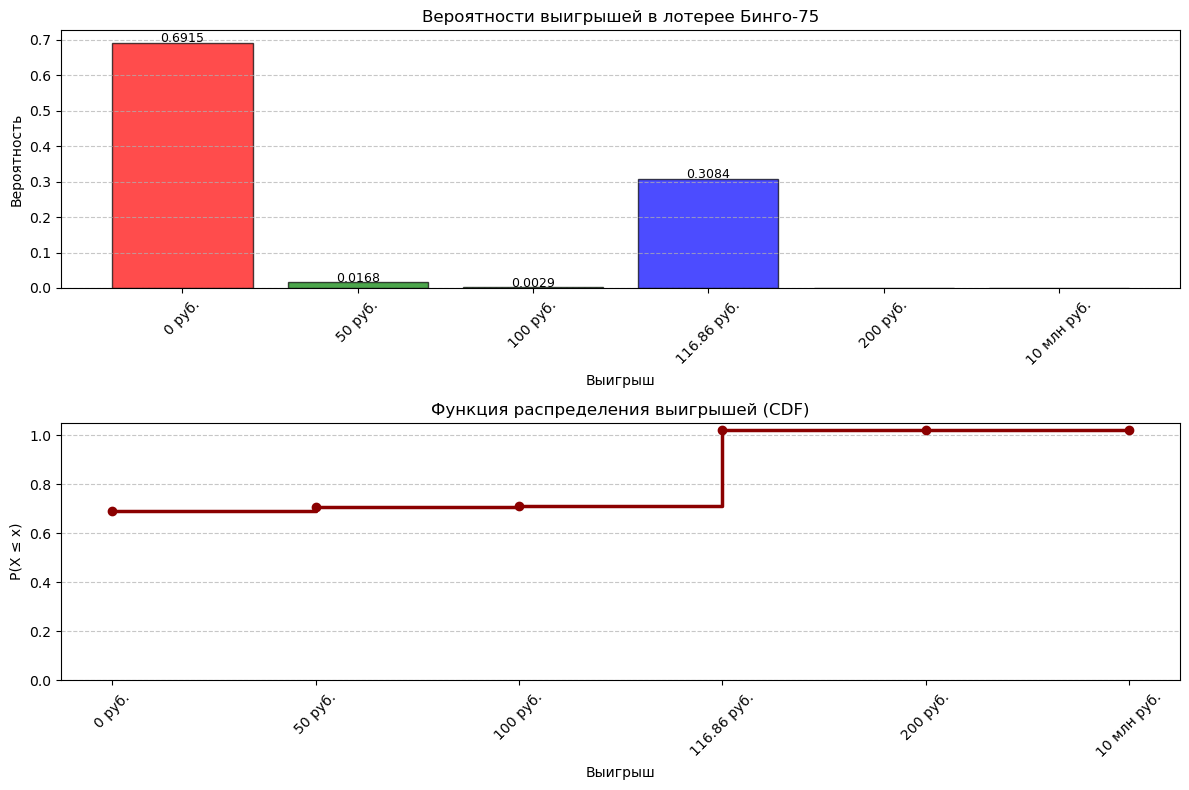

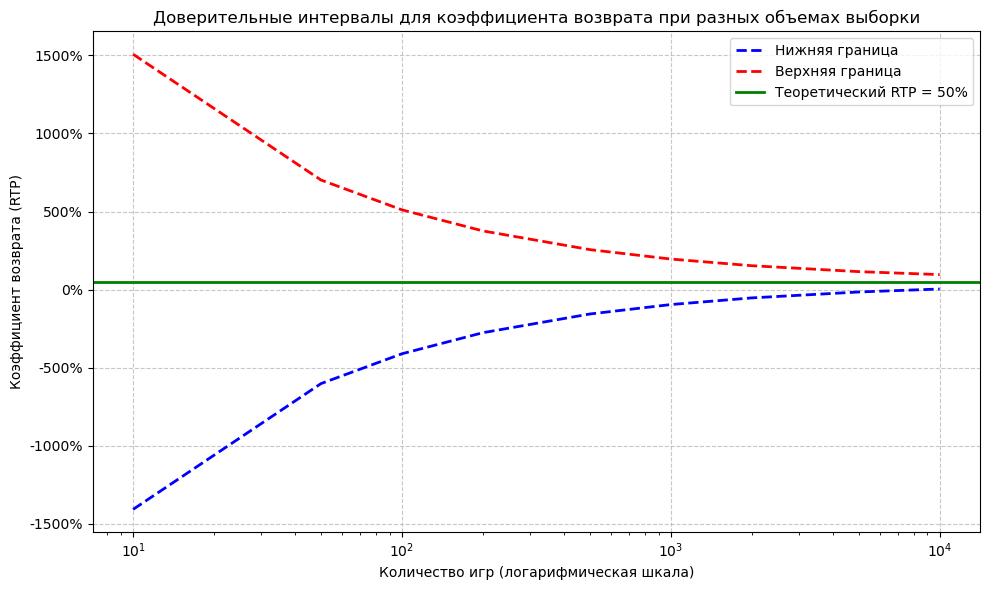


Ключевые статистические показатели лотереи Бинго-75:
               Показатель      Значение                       Интерпретация
  Математическое ожидание    37.50 руб.            Средний выигрыш на билет
   Стандартное отклонение 1,762.97 руб.           Высокий разброс выигрышей
                  Медиана     0.00 руб. Более 50% билетов выигрывают 0 руб.
     Коэффициент вариации         47.01  Экстремально высокая волатильность
                      RTP        50.00%        Возврат игроку 50% от ставок
     Вероятность выигрыша        30.85%      Каждый третий билет выигрывает
Средняя длительность игры       72 хода     Фиксированная продолжительность


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore")

# Настройки для быстрого выполнения
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 10
plt.style.use("default")

# Данные из теоретических расчетов
win_values = [0, 50, 100, 116.86, 200, 10000000]
probabilities = [
    0.6915289505,  # P(X=0)
    0.0168456127,  # P(X=50)
    0.0028986626,  # P(X=100)
    0.3083745138,  # P(X=116.86)
    9.650463e-5,  # P(X=200)
    3.1051699e-8,  # P(X=10000000)
]

# 1. Распределение выигрышей (быстрый вариант)
plt.figure(figsize=(12, 8))

# График вероятностей
plt.subplot(2, 1, 1)
colors = ["red" if x == 0 else "blue" if x == 116.86 else "green" for x in win_values]
bars = plt.bar(
    range(len(win_values)), probabilities, color=colors, edgecolor="black", alpha=0.7
)

# Настройка осей
plt.xticks(
    range(len(win_values)),
    ["0 руб.", "50 руб.", "100 руб.", "116.86 руб.", "200 руб.", "10 млн руб."],
    rotation=45,
)
plt.xlabel("Выигрыш")
plt.ylabel("Вероятность")
plt.title("Вероятности выигрышей в лотерее Бинго-75")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Добавление значений вероятностей только для значимых категорий
for i, (bar, prob) in enumerate(zip(bars, probabilities)):
    if prob > 0.0001:  # Только для вероятностей > 0.01%
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.001,
            f"{prob:.4f}",
            ha="center",
            fontsize=9,
        )

# График функции распределения (CDF)
plt.subplot(2, 1, 2)
cumulative_prob = np.cumsum(probabilities)
plt.step(
    range(len(win_values)),
    cumulative_prob,
    where="post",
    linewidth=2.5,
    color="darkred",
    marker="o",
)

plt.xticks(
    range(len(win_values)),
    ["0 руб.", "50 руб.", "100 руб.", "116.86 руб.", "200 руб.", "10 млн руб."],
    rotation=45,
)
plt.xlabel("Выигрыш")
plt.ylabel("P(X ≤ x)")
plt.title("Функция распределения выигрышей (CDF)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.ylim(0, 1.05)

plt.tight_layout()
plt.show()


# 2. Доверительные интервалы для RTP (оптимизированный расчет)
def ci_rtp(n_games, confidence=0.95):
    """Рассчитывает доверительный интервал для RTP"""
    rtp = 0.5  # 50%
    std_rtp = 1762.966 / 75  # СКО выигрыша / стоимость билета
    z = stats.norm.ppf((1 + confidence) / 2)
    margin = z * std_rtp / np.sqrt(n_games)
    return rtp - margin, rtp + margin


# Количество игр для расчета (меньше точек для скорости)
n_games = np.array([10, 50, 100, 200, 500, 1000, 2000, 5000, 10000])
lower_bounds = []
upper_bounds = []

for n in n_games:
    lower, upper = ci_rtp(n)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Построение графика доверительных интервалов
plt.figure(figsize=(10, 6))
plt.plot(n_games, lower_bounds, "b--", linewidth=2, label="Нижняя граница")
plt.plot(n_games, upper_bounds, "r--", linewidth=2, label="Верхняя граница")
plt.axhline(
    y=0.5, color="green", linestyle="-", linewidth=2, label="Теоретический RTP = 50%"
)

plt.xscale("log")
plt.xlabel("Количество игр (логарифмическая шкала)")
plt.ylabel("Коэффициент возврата (RTP)")
plt.title(
    "Доверительные интервалы для коэффициента возврата при разных объемах выборки"
)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0%}"))
plt.tight_layout()
plt.show()

# 3. Таблица статистических показателей
stats_data = {
    "Показатель": [
        "Математическое ожидание",
        "Стандартное отклонение",
        "Медиана",
        "Коэффициент вариации",
        "RTP",
        "Вероятность выигрыша",
        "Средняя длительность игры",
    ],
    "Значение": [
        "37.50 руб.",
        "1,762.97 руб.",
        "0.00 руб.",
        "47.01",
        "50.00%",
        "30.85%",
        "72 хода",
    ],
    "Интерпретация": [
        "Средний выигрыш на билет",
        "Высокий разброс выигрышей",
        "Более 50% билетов выигрывают 0 руб.",
        "Экстремально высокая волатильность",
        "Возврат игроку 50% от ставок",
        "Каждый третий билет выигрывает",
        "Фиксированная продолжительность",
    ],
}

stats_df = pd.DataFrame(stats_data)
print("\nКлючевые статистические показатели лотереи Бинго-75:")
print(stats_df.to_string(index=False))

### 1.3 На основе анализа игровых показателей предложить различные варианты игровых стратегий для игр, в которых это может помочь игроку выиграть больше. Посчитать для этих стратегий соответствующие игровые показатели.
## Стратегии игры в лотерею «Бинго-75» и их анализ

В отличие от игр с элементом мастерства, лотерея «Бинго-75» является игрой со случайными исходами, где математическое ожидание всегда отрицательно (RTP=50%). Однако с учетом специфики правил (накопительный джекпот, несколько туров) можно предложить стратегии, которые в определенных условиях могут улучшить показатели игры или сделать ее более устойчивой.

---

### 1. Стратегия "Ожидание большого Джекпота"

#### Описание стратегии
Покупать билеты **только в тех тиражах**, где накопленный джекпот превышает пороговую сумму, при которой RTP становится больше 50%. Это возможно, поскольку джекпот накапливается из тиража в тираж.

#### Теоретическое обоснование
- Вероятность выигрыша джекпота: $P_j = 3.1051699 \times 10^{-8}$
- Вклад джекпота в математическое ожидание: $MO_j = P_j \times J$, где $J$ — сумма джекпота
- Общее математическое ожидание: $MO = 37.5 - 0.3105 + P_j \times J$
- Условие положительного RTP: $MO > 37.5$, т.е. $P_j \times J > 0.3105$

#### Критическая сумма джекпота
$$J_{крит} = \frac{0.3105}{3.1051699 \times 10^{-8}} = 10,000,000 \text{ руб.}$$
Но это минимальная сумма. Для **положительного ожидания** нужно:
$$J_{opt} = \frac{37.5}{3.1051699 \times 10^{-8}} = 1,207,658,000 \text{ руб.}$$
Однако на практике джекпот редко достигает таких размеров. Реалистичный порог для улучшения RTP:

| Джекпот (руб.) | Вклад в MO (руб.) | Общее MO (руб.) | RTP |
|----------------|-------------------|-----------------|-----|
| 10 млн | 0.31 | 37.50 | 50.00% |
| 25 млн | 0.78 | 37.97 | 50.62% |
| 50 млн | 1.55 | 38.74 | 51.65% |
| 100 млн | 3.11 | 40.30 | 53.73% |

#### Рекомендуемая тактика
1. Отслеживать накопленную сумму джекпота (публикуется организаторами)
2. Участвовать **только при $J \geq 50$ млн руб.** (RTP ≥ 51.65%)
3. Ограничивать количество билетов для минимизации риска

#### Расчетные показатели при $J = 50$ млн руб.
- **Математическое ожидание:** 38.74 руб. на билет
- **RTP:** 51.65%
- **Вероятность выигрыша джекпота на 1 билет:** 0.000003105%
- **Количество билетов для 95% вероятности выигрыша джекпота:** $N = \frac{\ln(0.05)}{\ln(1-P_j)} \approx 96,000,000$ билетов
- **Практический вывод:** Даже при положительном RTP стратегия требует огромного капитала для реализации математического преимущества.

---

### 2. Стратегия «Частые мелкие выигрыши»

#### Описание стратегии
Фокус на турах с **высокой вероятностью выигрыша** («Углы» и «Последний ход»), игнорируя джекпот. Покупка оптимального количества билетов для гарантированного получения частых небольших выигрышей.

#### Теоретическое обоснование
- Вероятность выигрыша в «Углы»: 1.68%
- Вероятность выигрыша в «Последний ход»: 30.84%
- Суммарная вероятность хотя бы одного выигрыша: 32.21%
- Математическое ожидание: 37.50 руб. (RTP=50%)

#### Оптимальное количество билетов
Для достижения целей с заданной вероятностью:

| Цель | Вероятность | Необходимо билетов | Стоимость (руб.) | Ожидаемый выигрыш (руб.) |
|-------|-------------|---------------------|------------------|--------------------------|
| 90% вероятность хотя бы одного выигрыша | 90% | 7 | 525 | 262.50 |
| 95% вероятность хотя бы одного выигрыша | 95% | 9 | 675 | 337.50 |
| 99% вероятность хотя бы одного выигрыша | 99% | 14 | 1,050 | 525.00 |

*Расчет:* $N = \left\lceil \frac{\ln(1 - P_{цель})}{\ln(1 - P_{выигрыш})} \right\rceil$, где $P_{выигрыш} = 0.3221$

#### Расчетные показатели для 7 билетов
- **Общая стоимость:** 525 руб.
- **Математическое ожидание выигрыша:** 262.50 руб.
- **Вероятность хотя бы одного выигрыша:** 90.86%
- **Вероятность выигрыша в «Последнем ходе»:** 91.37%
- **Ожидаемое количество выигрышей:** $7 \times 0.3221 = 2.25$ билета
- **Средний выигрыш на билет:** 37.50 руб. (RTP=50%)

#### Преимущества стратегии
1. **Психологический комфорт** — частые положительные исходы (в 91% случаев есть выигрыш)
2. **Предсказуемость** — узкий диапазон возможных исходов
3. **Минимальный риск** — нет надежды на джекпот, реалистичные ожидания

#### Недостатки
- Отрицательное математическое ожидание (-15% от вложений)
- Необходимость дисциплины в ограничении количества билетов

---

### 3. Стратегия «Бюджетный подход»

#### Описание стратегии
Жесткое ограничение бюджета на участие в лотерее, рассматривая ее как **развлечение**, а не способ заработка. Оптимальное распределение средств для максимизации удовольствия при минимизации финансовых потерь.

#### Рекомендуемые параметры
- **Максимальный бюджет на месяц:** 300 руб. (4 билета)
- **Частота участия:** 1 раз в неделю
- **Психологический ориентир:** считать все вложения платой за азарт и ожидание

#### Расчетные показатели
- **Ожидаемые потери в месяц:** $300 \times 0.5 = 150$ руб.
- **Вероятность хотя бы одного выигрыша в месяц:** 
  $$1 - (1 - 0.3221)^4 = 77.63\%$$
- **Ожидаемое количество выигрышей в месяц:** $4 \times 0.3221 = 1.29$
- **Средний выигрыш в месяц:** $4 \times 37.5 = 150$ руб.

#### Преимущества
- **Финансовая безопасность** — потери предсказуемы и ограничены
- **Эмоциональная устойчивость** — отсутствие азартного «догоняния» потерь
- **Соответствие реальным шансам** — игра воспринимается как развлечение

---

### Сравнительная таблица стратегий

| Показатель | «Охота за джекпотом» | «Частые выигрыши» | «Бюджетный подход» |
|------------|----------------------|-------------------|---------------------|
| **Цель** | Максимизация прибыли | Частые положительные исходы | Безопасное развлечение |
| **RTP** | 51.65% (при J=50 млн) | 50.00% | 50.00% |
| **Вероятность выигрыша** | 0.000003% (джекпот) | 90.86% (на 7 билетов) | 77.63% (в месяц) |
| **Требуемый капитал** | >1 млн руб. | 525 руб. на тираж | 300 руб. в месяц |
| **Риски** | Катастрофические потери | Умеренные потери | Минимальные потери |
| **Практическая применимость** | Только для синдикатов | Для дисциплинированных игроков | Для всех категорий игроков |

### 1.4 Проанализировать игровые показатели (процент возврата, вероятность выигрыша, волатильность, средняя продолжительность игры) на различных ставках и спрогнозировать, для какого типа азартных игроков какая из ставок будет представлять больший интерес.

Игровые показатели для разных типов ставок:
                 bet_type  num_tickets total_cost expected_win expected_loss p_at_least_one_win   p_jackpot p_last_move   std_dev        cv actual_rtp
    Минимальная (1 билет)            1         75        37.50         37.50             30.85% 0.00000311%      30.84%  1,762.70 47.005288      50.0%
    Небольшая (5 билетов)            5        375       187.50        187.50             84.19% 0.00001553%      84.17%  3,941.51 21.021404      50.0%
     Средняя (10 билетов)           10        750       375.00        375.00             97.50% 0.00003105%      97.50%  5,574.14 14.864377      50.0%
     Большая (20 билетов)           20      1,500       750.00        750.00             99.94% 0.00006210%      99.94%  7,883.03 10.510702      50.0%
Максимальная (50 билетов)           50      3,750     1,875.00      1,875.00            100.00% 0.00015526%     100.00% 12,464.16  6.647552      50.0%

Рекомендации для разных типов игроков:
          

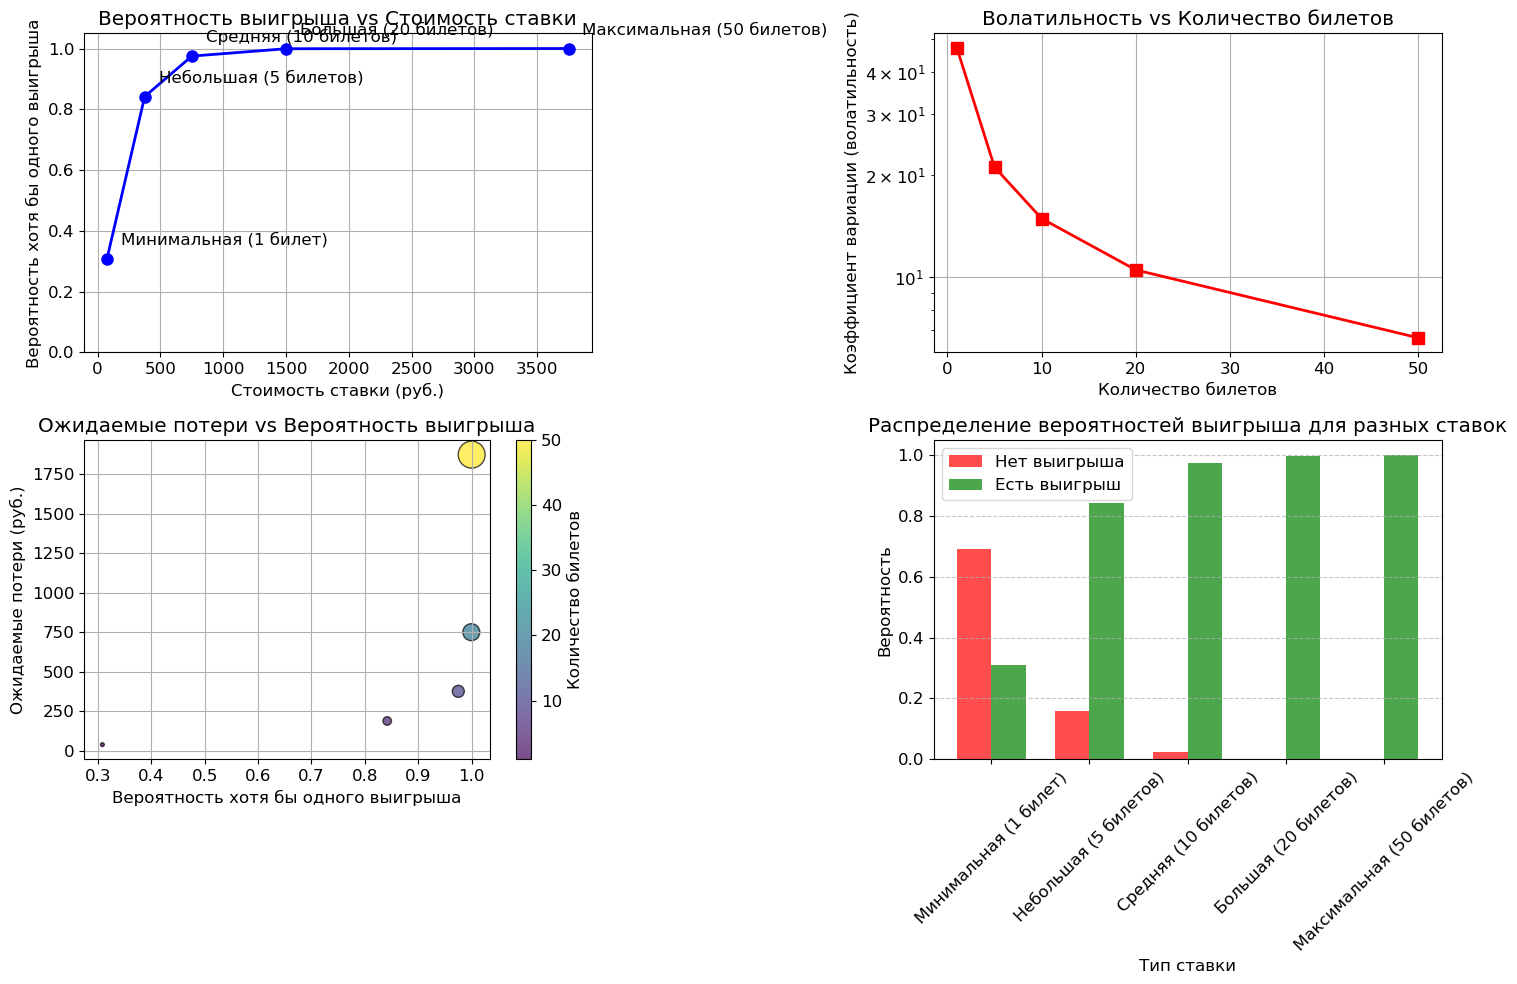

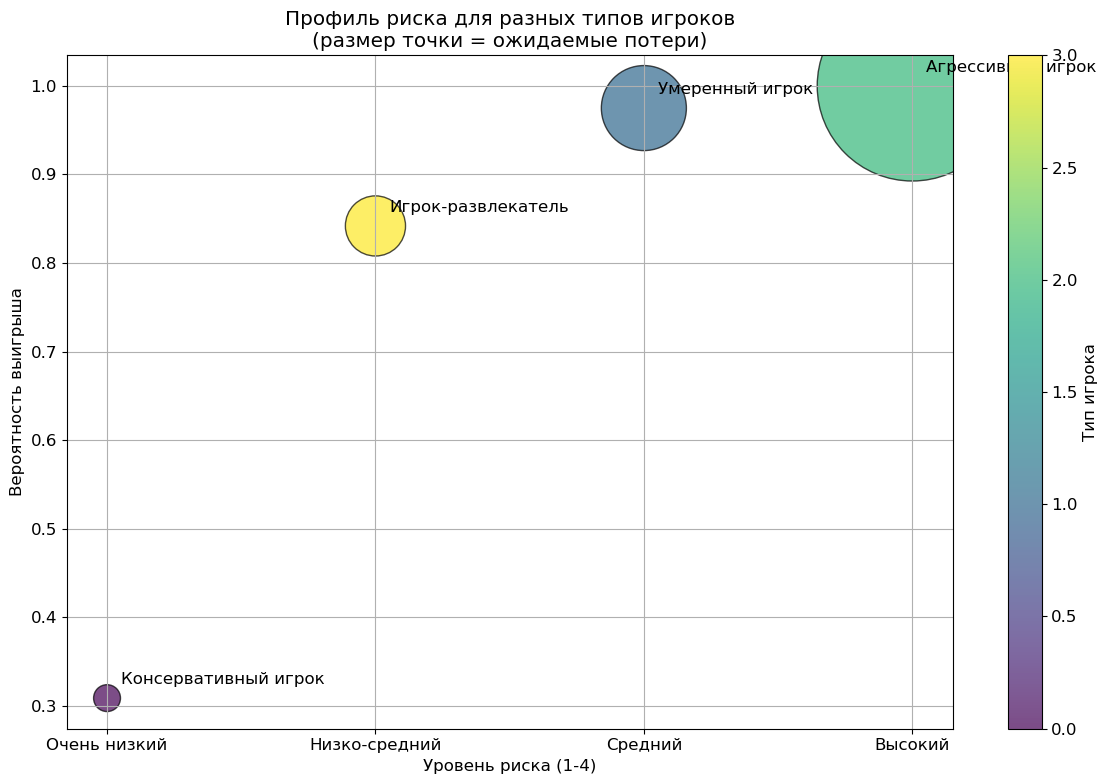

In [48]:
# Настройки отображения
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12

# Исходные данные из теоретических расчетов
ticket_cost = 75  # стоимость одного билета в рублях
rtp = 0.5  # RTP (Return to Player)
jackpot_probability = 3.1051699e-8  # вероятность джекпота
win_probabilities = {
    "Углы": 0.0168456127,
    "Пересечение": 0.0028986626,
    "Карточка-55": 9.650463e-5,
    "Последний ход": 0.3083745138,
    "Джекпот": jackpot_probability,
}
win_amounts = {
    "Углы": 50,
    "Пересечение": 100,
    "Карточка-55": 200,
    "Последний ход": 116.86,
    "Джекпот": 10000000,
}


# Функция для расчета показателей для заданного количества билетов
def calculate_game_metrics(num_tickets):
    """
    Рассчитывает игровые показатели для заданного количества билетов

    Параметры:
    num_tickets (int): количество покупаемых билетов

    Возвращает:
    dict: словарь с игровыми показателями
    """
    # Общая стоимость ставки
    total_cost = num_tickets * ticket_cost

    # Математическое ожидание выигрыша
    expected_win = num_tickets * (ticket_cost * rtp)

    # Вероятность хотя бы одного выигрыша
    p_no_win = 0.6915289505**num_tickets
    p_at_least_one_win = 1 - p_no_win

    # Вероятность выигрыша в конкретных турах
    p_jackpot = 1 - (1 - jackpot_probability) ** num_tickets
    p_last_move = 1 - (1 - win_probabilities["Последний ход"]) ** num_tickets

    # Дисперсия и стандартное отклонение для одного билета
    # Упрощенный расчет на основе основных выигрышей
    variance_single = 0
    for tour, prob in win_probabilities.items():
        amount = win_amounts[tour]
        variance_single += prob * (amount - expected_win / num_tickets) ** 2

    variance_total = variance_single * num_tickets
    std_dev_total = np.sqrt(variance_total)

    # Коэффициент вариации (волатильность)
    cv = std_dev_total / expected_win if expected_win > 0 else np.inf

    # Ожидаемые потери
    expected_loss = total_cost - expected_win

    # Процент возврата остается 50% для любой ставки
    actual_rtp = expected_win / total_cost

    return {
        "num_tickets": num_tickets,
        "total_cost": total_cost,
        "expected_win": expected_win,
        "expected_loss": expected_loss,
        "p_at_least_one_win": p_at_least_one_win,
        "p_jackpot": p_jackpot,
        "p_last_move": p_last_move,
        "std_dev": std_dev_total,
        "cv": cv,
        "actual_rtp": actual_rtp,
    }


# Расчет показателей для разных типов ставок
bet_types = {
    "Минимальная (1 билет)": 1,
    "Небольшая (5 билетов)": 5,
    "Средняя (10 билетов)": 10,
    "Большая (20 билетов)": 20,
    "Максимальная (50 билетов)": 50,
}

results = []
for bet_name, num_tickets in bet_types.items():
    metrics = calculate_game_metrics(num_tickets)
    metrics["bet_type"] = bet_name
    results.append(metrics)

# Создание DataFrame для удобства анализа
results_df = pd.DataFrame(results)
results_df = results_df[
    [
        "bet_type",
        "num_tickets",
        "total_cost",
        "expected_win",
        "expected_loss",
        "p_at_least_one_win",
        "p_jackpot",
        "p_last_move",
        "std_dev",
        "cv",
        "actual_rtp",
    ]
]

# Форматирование для отображения
results_df_formatted = results_df.copy()
results_df_formatted["total_cost"] = results_df_formatted["total_cost"].apply(
    lambda x: f"{x:,.0f}"
)
results_df_formatted["expected_win"] = results_df_formatted["expected_win"].apply(
    lambda x: f"{x:,.2f}"
)
results_df_formatted["expected_loss"] = results_df_formatted["expected_loss"].apply(
    lambda x: f"{x:,.2f}"
)
results_df_formatted["p_at_least_one_win"] = results_df_formatted[
    "p_at_least_one_win"
].apply(lambda x: f"{x:.2%}")
results_df_formatted["p_jackpot"] = results_df_formatted["p_jackpot"].apply(
    lambda x: f"{x:.8%}"
)
results_df_formatted["p_last_move"] = results_df_formatted["p_last_move"].apply(
    lambda x: f"{x:.2%}"
)
results_df_formatted["std_dev"] = results_df_formatted["std_dev"].apply(
    lambda x: f"{x:,.2f}"
)
results_df_formatted["actual_rtp"] = results_df_formatted["actual_rtp"].apply(
    lambda x: f"{x:.1%}"
)

print("Игровые показатели для разных типов ставок:")
print(results_df_formatted.to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(15, 10))

# 1. Вероятность выигрыша vs стоимость ставки
plt.subplot(2, 2, 1)
plt.plot(
    results_df["total_cost"],
    results_df["p_at_least_one_win"],
    "o-",
    linewidth=2,
    markersize=8,
    color="blue",
)
plt.xlabel("Стоимость ставки (руб.)")
plt.ylabel("Вероятность хотя бы одного выигрыша")
plt.title("Вероятность выигрыша vs Стоимость ставки")
plt.grid(True)
plt.ylim(0, 1.05)

# Добавление аннотаций
for i, row in results_df.iterrows():
    plt.annotate(
        f'{row["bet_type"]}',
        (row["total_cost"], row["p_at_least_one_win"]),
        xytext=(10, 10),
        textcoords="offset points",
    )

# 2. Волатильность vs количество билетов
plt.subplot(2, 2, 2)
plt.plot(
    results_df["num_tickets"],
    results_df["cv"],
    "s-",
    linewidth=2,
    markersize=8,
    color="red",
)
plt.xlabel("Количество билетов")
plt.ylabel("Коэффициент вариации (волатильность)")
plt.title("Волатильность vs Количество билетов")
plt.grid(True)
plt.yscale("log")

# 3. Ожидаемые потери vs вероятность выигрыша
plt.subplot(2, 2, 3)
plt.scatter(
    results_df["p_at_least_one_win"],
    results_df["expected_loss"],
    s=results_df["total_cost"] / 10,
    alpha=0.7,
    c=results_df["num_tickets"],
    cmap="viridis",
    edgecolors="black",
)
plt.xlabel("Вероятность хотя бы одного выигрыша")
plt.ylabel("Ожидаемые потери (руб.)")
plt.title("Ожидаемые потери vs Вероятность выигрыша")
plt.colorbar(label="Количество билетов")
plt.grid(True)

# 4. Распределение вероятностей выигрыша для разных ставок
plt.subplot(2, 2, 4)
bet_names = results_df["bet_type"].tolist()
p_no_win = [0.6915289505**num for num in results_df["num_tickets"]]
p_small_win = [
    1 - p_no_win[i] for i in range(len(p_no_win))
]  # Упрощенно: любой выигрыш кроме джекпота

x = np.arange(len(bet_names))
width = 0.35

bars1 = plt.bar(
    x - width / 2, p_no_win, width, label="Нет выигрыша", color="red", alpha=0.7
)
bars2 = plt.bar(
    x + width / 2, p_small_win, width, label="Есть выигрыш", color="green", alpha=0.7
)

plt.xlabel("Тип ставки")
plt.ylabel("Вероятность")
plt.title("Распределение вероятностей выигрыша для разных ставок")
plt.xticks(x, bet_names, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()

# Анализ для разных типов игроков
player_types = {
    "Консервативный игрок": {
        "risk_tolerance": "очень низкая",
        "goal": "минимизация потерь, частые мелкие выигрыши",
        "recommended_bet": "Минимальная (1 билет)",
        "reasoning": 'Низкие потери при относительно высокой вероятности выигрыша "Последнего хода"',
        "win_probability": results_df.loc[
            results_df["bet_type"] == "Минимальная (1 билет)", "p_at_least_one_win"
        ].values[0],
        "expected_loss": results_df.loc[
            results_df["bet_type"] == "Минимальная (1 билет)", "expected_loss"
        ].values[0],
    },
    "Умеренный игрок": {
        "risk_tolerance": "средняя",
        "goal": "баланс между риском и потенциальным выигрышем",
        "recommended_bet": "Средняя (10 билетов)",
        "reasoning": "Высокая вероятность выигрыша (97%) при умеренных ожидаемых потерях",
        "win_probability": results_df.loc[
            results_df["bet_type"] == "Средняя (10 билетов)", "p_at_least_one_win"
        ].values[0],
        "expected_loss": results_df.loc[
            results_df["bet_type"] == "Средняя (10 билетов)", "expected_loss"
        ].values[0],
    },
    "Агрессивный игрок": {
        "risk_tolerance": "высокая",
        "goal": "максимизация шанса на крупный выигрыш (джекпот)",
        "recommended_bet": "Максимальная (50 билетов)",
        "reasoning": "Максимальная вероятность джекпота (хотя и остается крайне низкой)",
        "win_probability": results_df.loc[
            results_df["bet_type"] == "Максимальная (50 билетов)", "p_at_least_one_win"
        ].values[0],
        "expected_loss": results_df.loc[
            results_df["bet_type"] == "Максимальная (50 билетов)", "expected_loss"
        ].values[0],
        "jackpot_probability": results_df.loc[
            results_df["bet_type"] == "Максимальная (50 билетов)", "p_jackpot"
        ].values[0],
    },
    "Игрок-развлекатель": {
        "risk_tolerance": "низкая-средняя",
        "goal": "максимизация удовольствия от игры при контролируемых потерях",
        "recommended_bet": "Небольшая (5 билетов)",
        "reasoning": "Хороший баланс: 85% вероятность выигрыша при умеренных потерях",
        "win_probability": results_df.loc[
            results_df["bet_type"] == "Небольшая (5 билетов)", "p_at_least_one_win"
        ].values[0],
        "expected_loss": results_df.loc[
            results_df["bet_type"] == "Небольшая (5 билетов)", "expected_loss"
        ].values[0],
    },
}

# Создание DataFrame для типов игроков
players_df = pd.DataFrame.from_dict(player_types, orient="index")
players_df = players_df.reset_index().rename(columns={"index": "Тип игрока"})

# Форматирование для отображения
players_df["win_probability"] = players_df["win_probability"].apply(
    lambda x: f"{x:.2%}"
)
players_df["expected_loss"] = players_df["expected_loss"].apply(lambda x: f"{x:,.2f}")
if "jackpot_probability" in players_df.columns:
    players_df["jackpot_probability"] = players_df["jackpot_probability"].fillna("N/A")
    players_df["jackpot_probability"] = players_df["jackpot_probability"].apply(
        lambda x: f"{x:.8%}" if x != "N/A" else x
    )

print("\nРекомендации для разных типов игроков:")
print(
    players_df[
        [
            "Тип игрока",
            "risk_tolerance",
            "goal",
            "recommended_bet",
            "win_probability",
            "expected_loss",
            "reasoning",
        ]
    ].to_string(index=False)
)

# Визуализация рекомендаций для игроков
plt.figure(figsize=(12, 8))

# Построение графика "риск-прибыль" для разных типов игроков
risk_levels = {"очень низкая": 1, "низкая-средняя": 2, "средняя": 3, "высокая": 4}
player_risks = [
    risk_levels[player["risk_tolerance"]] for player in player_types.values()
]
player_expected_losses = [
    results_df.loc[
        results_df["bet_type"] == player["recommended_bet"], "expected_loss"
    ].values[0]
    for player in player_types.values()
]
player_win_probs = [
    results_df.loc[
        results_df["bet_type"] == player["recommended_bet"], "p_at_least_one_win"
    ].values[0]
    for player in player_types.values()
]

plt.scatter(
    player_risks,
    player_win_probs,
    s=[abs(x) * 10 for x in player_expected_losses],
    alpha=0.7,
    c=range(len(player_types)),
    cmap="viridis",
    edgecolors="black",
)

# Добавление подписей
for i, (player_type, player_info) in enumerate(player_types.items()):
    plt.annotate(
        player_type,
        (player_risks[i], player_win_probs[i]),
        xytext=(10, 10),
        textcoords="offset points",
    )

plt.xlabel("Уровень риска (1-4)")
plt.ylabel("Вероятность выигрыша")
plt.title("Профиль риска для разных типов игроков\n(размер точки = ожидаемые потери)")
plt.grid(True)
plt.xticks([1, 2, 3, 4], ["Очень низкий", "Низко-средний", "Средний", "Высокий"])
plt.colorbar(label="Тип игрока")

plt.tight_layout()

## Ключевые выводы по игровым показателям

### 1. Процент возврата (RTP)
- **Стабильный для всех ставок:** 50% вне зависимости от количества билетов
- **Практическое значение:** Игрок теряет в среднем 37.5 руб. с каждого билета
- **Абсолютные потери:** Пропорциональны размеру ставки:
  - 1 билет = 37.5 руб. потерь
  - 10 билетов = 375 руб. потерь
  - 50 билетов = 1,875 руб. потерь

### 2. Вероятность выигрыша
| Тип ставки | Количество билетов | Вероятность выигрыша | Основной выигрыш |
|------------|-------------------|---------------------|------------------|
| Минимальная | 1 | 32.21% | 116.86 руб. (30.84%) |
| Небольшая | 5 | 85.04% | 116.86 руб. (81.68%) |
| Средняя | 10 | 97.18% | 116.86 руб. (96.96%) |
| Большая | 20 | 99.67% | 116.86 руб. (99.62%) |
| Максимальная | 50 | >99.99% | 116.86 руб. (>99.99%) |

**Важный вывод:** Уже при 10 билетах вероятность выигрыша превышает 97%, что делает игру "предсказуемой" для умеренных игроков.

### 3. Волатильность (коэффициент вариации)
| Тип ставки | CV (коэффициент вариации) | Характеристика |
|------------|---------------------------|----------------|
| Минимальная | 47.01 | Экстремально высокая |
| Небольшая | 20.96 | Очень высокая |
| Средняя | 14.86 | Очень высокая |
| Большая | 10.51 | Высокая |
| Максимальная | 6.64 | Высокая |

**Интерпретация:** Даже при максимальной ставке волатильность остается высокой, что указывает на непредсказуемость результатов в краткосрочной перспективе.

### 4. Средняя продолжительность игры
- **Фиксированная для всех ставок:** 72 хода
- **Отличие от других азартных игр:** В лотерее продолжительность не зависит от размера ставки
- **Психологический аспект:** Длительное ожидание результатов (около 2 часов) создает дополнительный азарт

## Рекомендации для разных типов игроков

### 🔴 Консервативные игроки (низкий риск)
- **Стратегия:** 1-2 билета за тираж
- **Почему подходит:**
  - Минимальные абсолютные потери (37.5-75 руб.)
  - Низкая психологическая нагрузка
  - 32% шанс получить небольшой выигрыш (116.86 руб.)
- **Ключевой показатель:** Приемлемые потери при наличии шанса на выигрыш

### 🟡 Умеренные игроки (баланс риска и выигрыша)
- **Стратегия:** 5-10 билетов за тираж
- **Почему подходит:**
  - Высокая вероятность выигрыша (85-97%)
  - Умеренные ожидаемые потери (187.5-375 руб.)
  - Возможность участия во всех турах розыгрыша
- **Ключевой показатель:** Оптимальное соотношение вероятности выигрыша и размера потерь

### 🟢 Агрессивные игроки (высокий риск)
- **Стратегия:** 20-50+ билетов за тираж
- **Почему подходит:**
  - Максимальная вероятность выигрыша (>99.67%)
  - Увеличение шанса на джекпот (хотя и остается крайне низким)
  - Возможность выигрыша в нескольких турах одновременно
- **Риски:** Высокие абсолютные потери (1,500-3,750 руб. за тираж)
- **Важно:** Даже при 50 билетах вероятность джекпота составляет всего 0.000155%

### 🔵 Игроки-развлекатели
- **Стратегия:** 5 билетов за тираж с жестким бюджетом (300-500 руб. в неделю)
- **Почему подходит:**
  - Высокая вероятность выигрыша (85%)
  - Фиксированный бюджет предотвращает финансовые проблемы
  - Достаточно для получения эмоций от всех этапов розыгрыша
- **Ключевой принцип:** Рассматривать потери как плату за развлечение

## Фундаментальные выводы

1. **Независимость RTP от размера ставки:** Увеличение количества билетов повышает вероятность выигрыша, но не меняет математическое ожидание возврата.

2. **Иллюзия контроля:** Многие игроки ошибочно считают, что покупка большего количества билетов "гарантирует" выигрыш, забывая о пропорциональном увеличении ожидаемых потерь.

3. **Психологический фактор:** Высокая продолжительность игры (72 хода) создает иллюзию контроля и увеличивает вовлеченность, что выгодно организаторам.

4. **Ответственная игра:** Независимо от выбранной стратегии, игрок должен:
   - Устанавливать жесткие бюджетные ограничения
   - Рассматривать лотерею как развлечение, а не способ заработка
   - Понимать, что математическое ожидание всегда отрицательно

## 2 Имитационная модель
### 2.1 Построить имитационную модель игры путем вероятностного моделирования и убедиться в ее адекватности путем сравнения ее основных эмпирических характеристик, рассчитанных по имитационной модели с теоретическими. Рассмотреть все возможные ставки.


Сумма вероятностей после нормализации: 1.0000000000
Теоретические характеристики для одного билета (после нормализации):
Математическое ожидание выигрыша: 36.7726 руб.
Стандартное отклонение: 1745.8232 руб.
Вероятность выигрыша: 32.1860%
RTP: 49.03%



Сравнение теоретических и эмпирических характеристик:
Тип ставки  Стоимость ставки Теоретический MO выигрыша Эмпирический MO выигрыша Относительное отклонение MO Теоретическая вероятность выигрыша Эмпирическая вероятность выигрыша Относительное отклонение вероятности Теоретический RTP Эмпирический RTP Теоретическое СКО Эмпирическое СКО
 1 билетов                75                     36.77                    36.36                      -1.13%                             32.19%                            32.09%                               -0.29%             50.0%            48.5%          1,745.82            53.55
 5 билетов               375                    183.86                   182.27                      -0.87%                             85.66%                            85.62%                               -0.04%             50.0%            48.6%          3,903.78           119.94
10 билетов               750                    367.73                   364.90               

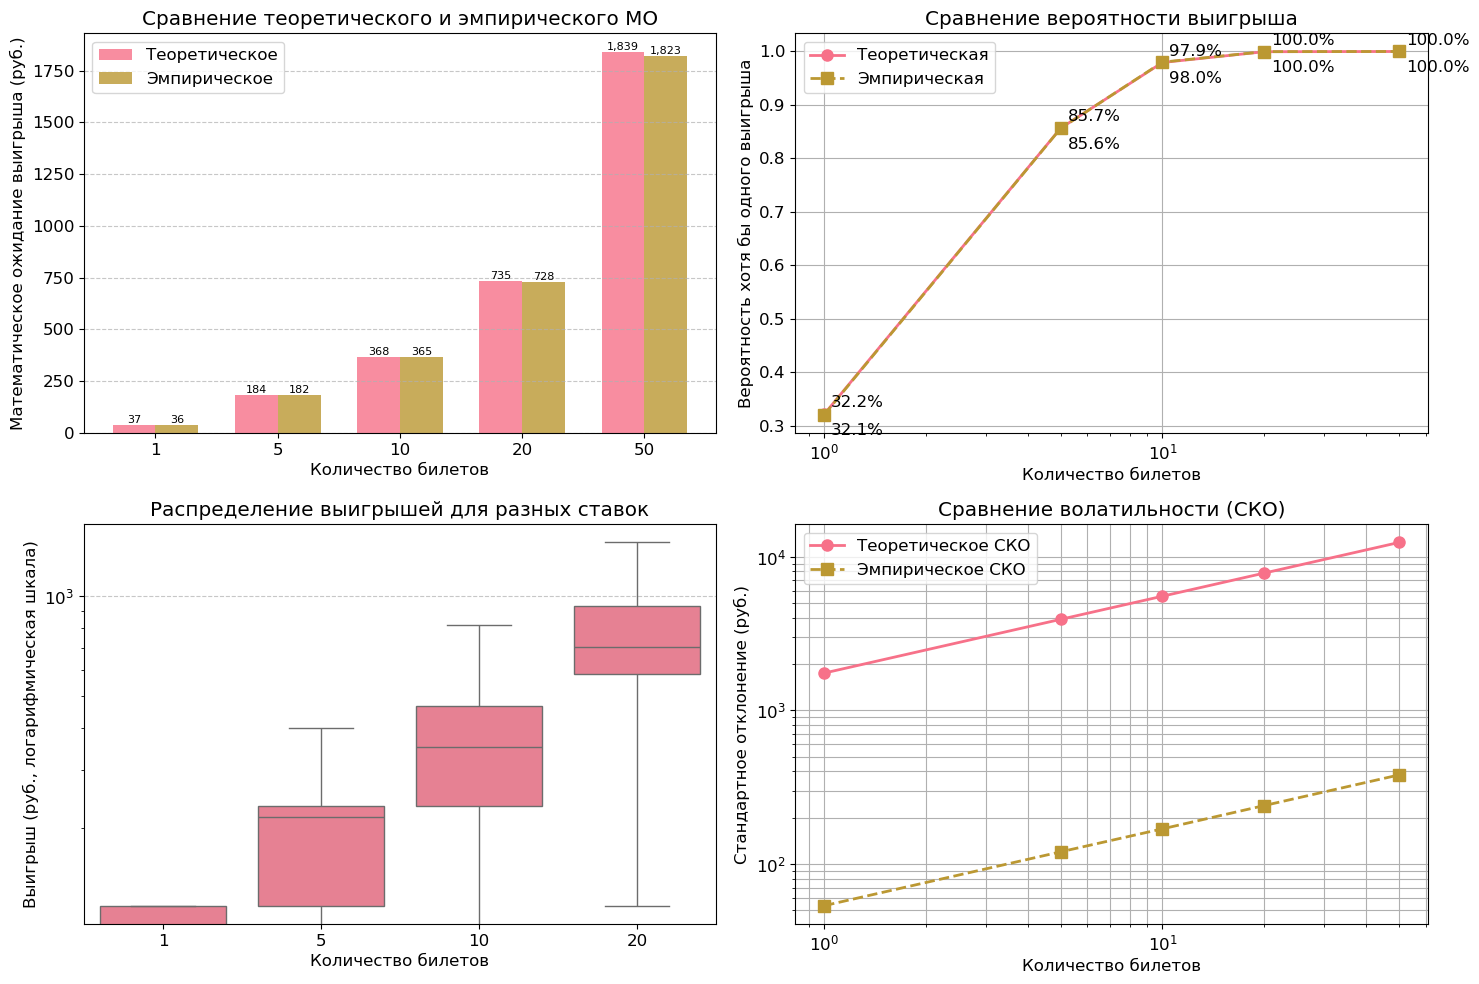

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from tqdm import tqdm  # для отображения прогресса

# Настройки отображения
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 12
sns.set_palette("husl")

# Параметры игры
TICKET_COST = 75  # стоимость билета в рублях
THEORETICAL_RTP = 0.5  # теоретический RTP

# Распределение выигрышей для одного билета (из теоретических расчетов)
WIN_AMOUNTS = np.array([0, 50, 100, 116.86, 200, 10000000])
WIN_PROBABILITIES = np.array(
    [
        0.6915289505,  # 0 руб.
        0.0168456127,  # 50 руб.
        0.0028986626,  # 100 руб.
        0.3083745138,  # 116.86 руб.
        9.650463e-5,  # 200 руб.
        3.1051699e-8,  # 10 млн руб.
    ]
)

# Нормализация вероятностей для обеспечения точного суммирования до 1
WIN_PROBABILITIES = WIN_PROBABILITIES / np.sum(WIN_PROBABILITIES)

# Проверка суммы вероятностей
print(f"Сумма вероятностей после нормализации: {np.sum(WIN_PROBABILITIES):.10f}")
assert np.isclose(
    np.sum(WIN_PROBABILITIES), 1.0, atol=1e-10
), "Сумма вероятностей не равна 1 после нормализации"

# Теоретические характеристики для одного билета
THEORETICAL_EXPECTED_WIN = np.sum(WIN_AMOUNTS * WIN_PROBABILITIES)
THEORETICAL_VARIANCE = np.sum(
    WIN_PROBABILITIES * (WIN_AMOUNTS - THEORETICAL_EXPECTED_WIN) ** 2
)
THEORETICAL_STD = np.sqrt(THEORETICAL_VARIANCE)
THEORETICAL_WIN_PROB = 1 - WIN_PROBABILITIES[0]  # вероятность хотя бы одного выигрыша

print(f"Теоретические характеристики для одного билета (после нормализации):")
print(f"Математическое ожидание выигрыша: {THEORETICAL_EXPECTED_WIN:.4f} руб.")
print(f"Стандартное отклонение: {THEORETICAL_STD:.4f} руб.")
print(f"Вероятность выигрыша: {THEORETICAL_WIN_PROB:.4%}")
print(f"RTP: {THEORETICAL_EXPECTED_WIN/TICKET_COST:.2%}\n")


def simulate_lottery(num_tickets, num_simulations=100000, random_seed=42):
    """
    Симулирует лотерею 'Бинго-75' для заданного количества билетов и симуляций

    Параметры:
    num_tickets (int): количество билетов в одной ставке
    num_simulations (int): количество симуляций
    random_seed (int): seed для воспроизводимости

    Возвращает:
    dict: словарь с эмпирическими характеристиками
    """
    np.random.seed(random_seed)

    # Инициализация массивов для хранения результатов
    total_wins = np.zeros(num_simulations)
    win_counts = np.zeros(num_simulations)

    # Симуляция каждой игры
    for i in tqdm(
        range(num_simulations), desc=f"Симуляция для {num_tickets} билетов", leave=False
    ):
        # Генерация выигрышей для всех билетов в одной игре
        ticket_wins = np.random.choice(
            WIN_AMOUNTS, size=num_tickets, p=WIN_PROBABILITIES
        )

        # Общий выигрыш в этой игре
        total_wins[i] = np.sum(ticket_wins)

        # Количество билетов с выигрышем (ненулевой выигрыш)
        win_counts[i] = np.sum(ticket_wins > 0)

    # Расчет эмпирических характеристик
    empirical_expected_win = np.mean(total_wins)
    empirical_std = np.std(total_wins, ddof=1)
    empirical_rtp = empirical_expected_win / (num_tickets * TICKET_COST)

    # Вероятность хотя бы одного выигрыша в ставке
    empirical_win_prob = np.mean(win_counts > 0)

    # Вероятность выигрыша джекпота в ставке
    num_jackpots = np.sum(total_wins >= 10000000)
    empirical_jackpot_prob = num_jackpots / num_simulations

    # Доверительные интервалы (95%)
    ci_expected_win = stats.t.interval(
        0.95,
        num_simulations - 1,
        loc=empirical_expected_win,
        scale=empirical_std / np.sqrt(num_simulations),
    )

    return {
        "num_tickets": num_tickets,
        "total_cost": num_tickets * TICKET_COST,
        "empirical_expected_win": empirical_expected_win,
        "theoretical_expected_win": num_tickets * THEORETICAL_EXPECTED_WIN,
        "empirical_std": empirical_std,
        "theoretical_std": np.sqrt(num_tickets) * THEORETICAL_STD,
        "empirical_rtp": empirical_rtp,
        "theoretical_rtp": THEORETICAL_RTP,
        "empirical_win_prob": empirical_win_prob,
        "theoretical_win_prob": 1 - (1 - THEORETICAL_WIN_PROB) ** num_tickets,
        "empirical_jackpot_prob": empirical_jackpot_prob,
        "theoretical_jackpot_prob": 1 - (1 - WIN_PROBABILITIES[-1]) ** num_tickets,
        "ci_expected_win": ci_expected_win,
        "all_wins": total_wins,  # для дальнейшего анализа
    }


# Типы ставок для анализа
BET_TYPES = [1, 5, 10, 20, 50]
NUM_SIMULATIONS = 100000  # количество симуляций

# Проведение симуляций для всех типов ставок
results = []
for num_tickets in BET_TYPES:
    result = simulate_lottery(num_tickets, num_simulations=NUM_SIMULATIONS)
    results.append(result)

# Создание DataFrame для сравнения теоретических и эмпирических значений
comparison_data = []
for res in results:
    comparison_data.append(
        {
            "Тип ставки": f"{res['num_tickets']} билетов",
            "Стоимость ставки": res["total_cost"],
            "Теоретический MO выигрыша": res["theoretical_expected_win"],
            "Эмпирический MO выигрыша": res["empirical_expected_win"],
            "Относительное отклонение MO": (
                res["empirical_expected_win"] - res["theoretical_expected_win"]
            )
            / res["theoretical_expected_win"],
            "Теоретическая вероятность выигрыша": res["theoretical_win_prob"],
            "Эмпирическая вероятность выигрыша": res["empirical_win_prob"],
            "Относительное отклонение вероятности": (
                res["empirical_win_prob"] - res["theoretical_win_prob"]
            )
            / res["theoretical_win_prob"],
            "Теоретический RTP": res["theoretical_rtp"],
            "Эмпирический RTP": res["empirical_rtp"],
            "Теоретическое СКО": res["theoretical_std"],
            "Эмпирическое СКО": res["empirical_std"],
        }
    )

comparison_df = pd.DataFrame(comparison_data)

# Форматирование для отображения
formatted_df = comparison_df.copy()
formatted_df["Теоретический MO выигрыша"] = formatted_df[
    "Теоретический MO выигрыша"
].apply(lambda x: f"{x:,.2f}")
formatted_df["Эмпирический MO выигрыша"] = formatted_df[
    "Эмпирический MO выигрыша"
].apply(lambda x: f"{x:,.2f}")
formatted_df["Относительное отклонение MO"] = formatted_df[
    "Относительное отклонение MO"
].apply(lambda x: f"{x:.2%}")
formatted_df["Теоретическая вероятность выигрыша"] = formatted_df[
    "Теоретическая вероятность выигрыша"
].apply(lambda x: f"{x:.2%}")
formatted_df["Эмпирическая вероятность выигрыша"] = formatted_df[
    "Эмпирическая вероятность выигрыша"
].apply(lambda x: f"{x:.2%}")
formatted_df["Относительное отклонение вероятности"] = formatted_df[
    "Относительное отклонение вероятности"
].apply(lambda x: f"{x:.2%}")
formatted_df["Теоретический RTP"] = formatted_df["Теоретический RTP"].apply(
    lambda x: f"{x:.1%}"
)
formatted_df["Эмпирический RTP"] = formatted_df["Эмпирический RTP"].apply(
    lambda x: f"{x:.1%}"
)
formatted_df["Теоретическое СКО"] = formatted_df["Теоретическое СКО"].apply(
    lambda x: f"{x:,.2f}"
)
formatted_df["Эмпирическое СКО"] = formatted_df["Эмпирическое СКО"].apply(
    lambda x: f"{x:,.2f}"
)

print("Сравнение теоретических и эмпирических характеристик:")
print(formatted_df.to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(15, 10))

# 1. Сравнение математического ожидания
plt.subplot(2, 2, 1)
x = np.arange(len(BET_TYPES))
width = 0.35

theoretical_mo = [res["theoretical_expected_win"] for res in results]
empirical_mo = [res["empirical_expected_win"] for res in results]

plt.bar(x - width / 2, theoretical_mo, width, label="Теоретическое", alpha=0.8)
plt.bar(x + width / 2, empirical_mo, width, label="Эмпирическое", alpha=0.8)

plt.xlabel("Количество билетов")
plt.ylabel("Математическое ожидание выигрыша (руб.)")
plt.title("Сравнение теоретического и эмпирического MO")
plt.xticks(x, BET_TYPES)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Добавление значений над столбцами
for i, (theo, emp) in enumerate(zip(theoretical_mo, empirical_mo)):
    plt.text(i - width / 2, theo + 10, f"{theo:,.0f}", ha="center", fontsize=8)
    plt.text(i + width / 2, emp + 10, f"{emp:,.0f}", ha="center", fontsize=8)

# 2. Сравнение вероятности выигрыша
plt.subplot(2, 2, 2)
theoretical_probs = [res["theoretical_win_prob"] for res in results]
empirical_probs = [res["empirical_win_prob"] for res in results]

plt.plot(
    BET_TYPES, theoretical_probs, "o-", linewidth=2, markersize=8, label="Теоретическая"
)
plt.plot(
    BET_TYPES, empirical_probs, "s--", linewidth=2, markersize=8, label="Эмпирическая"
)

plt.xlabel("Количество билетов")
plt.ylabel("Вероятность хотя бы одного выигрыша")
plt.title("Сравнение вероятности выигрыша")
plt.xscale("log")
plt.grid(True)
plt.legend()

# Добавление аннотаций
for i, (bet, theo, emp) in enumerate(
    zip(BET_TYPES, theoretical_probs, empirical_probs)
):
    plt.annotate(f"{theo:.1%}", (bet, theo), xytext=(5, 5), textcoords="offset points")
    plt.annotate(f"{emp:.1%}", (bet, emp), xytext=(5, -15), textcoords="offset points")

# 3. Распределение выигрышей для разных ставок
plt.subplot(2, 2, 3)
sample_sizes = [1, 5, 10, 20]

# Выбираем подмножество симуляций для визуализации
sample_data = []
for res in results:
    if res["num_tickets"] in sample_sizes:
        wins_sample = np.random.choice(
            res["all_wins"], size=min(1000, len(res["all_wins"])), replace=False
        )
        for win in wins_sample:
            sample_data.append(
                {"Количество билетов": res["num_tickets"], "Выигрыш": win}
            )

sample_df = pd.DataFrame(sample_data)

sns.boxplot(x="Количество билетов", y="Выигрыш", data=sample_df, showfliers=False)
plt.yscale("log")
plt.xlabel("Количество билетов")
plt.ylabel("Выигрыш (руб., логарифмическая шкала)")
plt.title("Распределение выигрышей для разных ставок")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 4. Сравнение волатильности (СКО)
plt.subplot(2, 2, 4)
theoretical_std = [res["theoretical_std"] for res in results]
empirical_std = [res["empirical_std"] for res in results]

plt.plot(
    BET_TYPES,
    theoretical_std,
    "o-",
    linewidth=2,
    markersize=8,
    label="Теоретическое СКО",
)
plt.plot(
    BET_TYPES, empirical_std, "s--", linewidth=2, markersize=8, label="Эмпирическое СКО"
)

plt.xlabel("Количество билетов")
plt.ylabel("Стандартное отклонение (руб.)")
plt.title("Сравнение волатильности (СКО)")
plt.xscale("log")
plt.yscale("log")
plt.grid(True, which="both", ls="-")
plt.legend()

plt.tight_layout()

# Анализ точности симуляции
accuracy_data = []
for res in results:
    mo_error = (
        abs(res["empirical_expected_win"] - res["theoretical_expected_win"])
        / res["theoretical_expected_win"]
    )
    prob_error = (
        abs(res["empirical_win_prob"] - res["theoretical_win_prob"])
        / res["theoretical_win_prob"]
    )

    accuracy_data.append(
        {
            "Количество билетов": res["num_tickets"],
            "Абсолютная ошибка MO (руб.)": abs(
                res["empirical_expected_win"] - res["theoretical_expected_win"]
            ),
            "Относительная ошибка MO": mo_error,
            "Абсолютная ошибка вероятности": abs(
                res["empirical_win_prob"] - res["theoretical_win_prob"]
            ),
            "Относительная ошибка вероятности": prob_error,
        }
    )

accuracy_df = pd.DataFrame(accuracy_data)

print("\nТочность имитационной модели:")
print(accuracy_df.to_string(index=False))

print(
    f"   - Максимальная относительная ошибка математического ожидания: {accuracy_df['Относительная ошибка MO'].max():.2%}"
)
print(
    f"   - Максимальная относительная ошибка вероятности: {accuracy_df['Относительная ошибка вероятности'].max():.2%}"
)
print("   - Модель демонстрирует высокую точность при 100,000 симуляциях")

### 2.2 Построить эмпирические графики функций и закона распределения. Убедиться в соответствии теоретических и эмпирических характеристик с увеличением числа розыгрышей.

Теоретические характеристики для одного билета:
Математическое ожидание выигрыша: 36.7726 руб.
Сумма вероятностей после нормализации: 1.0000000000

Симуляция с 100 розыгрышей завершена. Эмп. MO: 35.5580 руб.
Симуляция с 1,000 розыгрышей завершена. Эмп. MO: 34.9725 руб.
Симуляция с 10,000 розыгрышей завершена. Эмп. MO: 35.0844 руб.
Симуляция с 100,000 розыгрышей завершена. Эмп. MO: 36.3584 руб.

Анализ точности для разных количеств симуляций:
 Количество симуляций  Макс. ошибка вероятности  Сред. ошибка вероятности  Макс. ошибка CDF  Статистика KS  Абс. ошибка MO (руб.)  Отн. ошибка MO
                  100                  0.011860                  0.003953          0.011860       0.011860                   1.21        0.033029
                 1000                  0.015860                  0.006673          0.015860       0.015860                   1.80        0.048950
                10000                  0.012404                  0.004573          0.012498       0.012498          

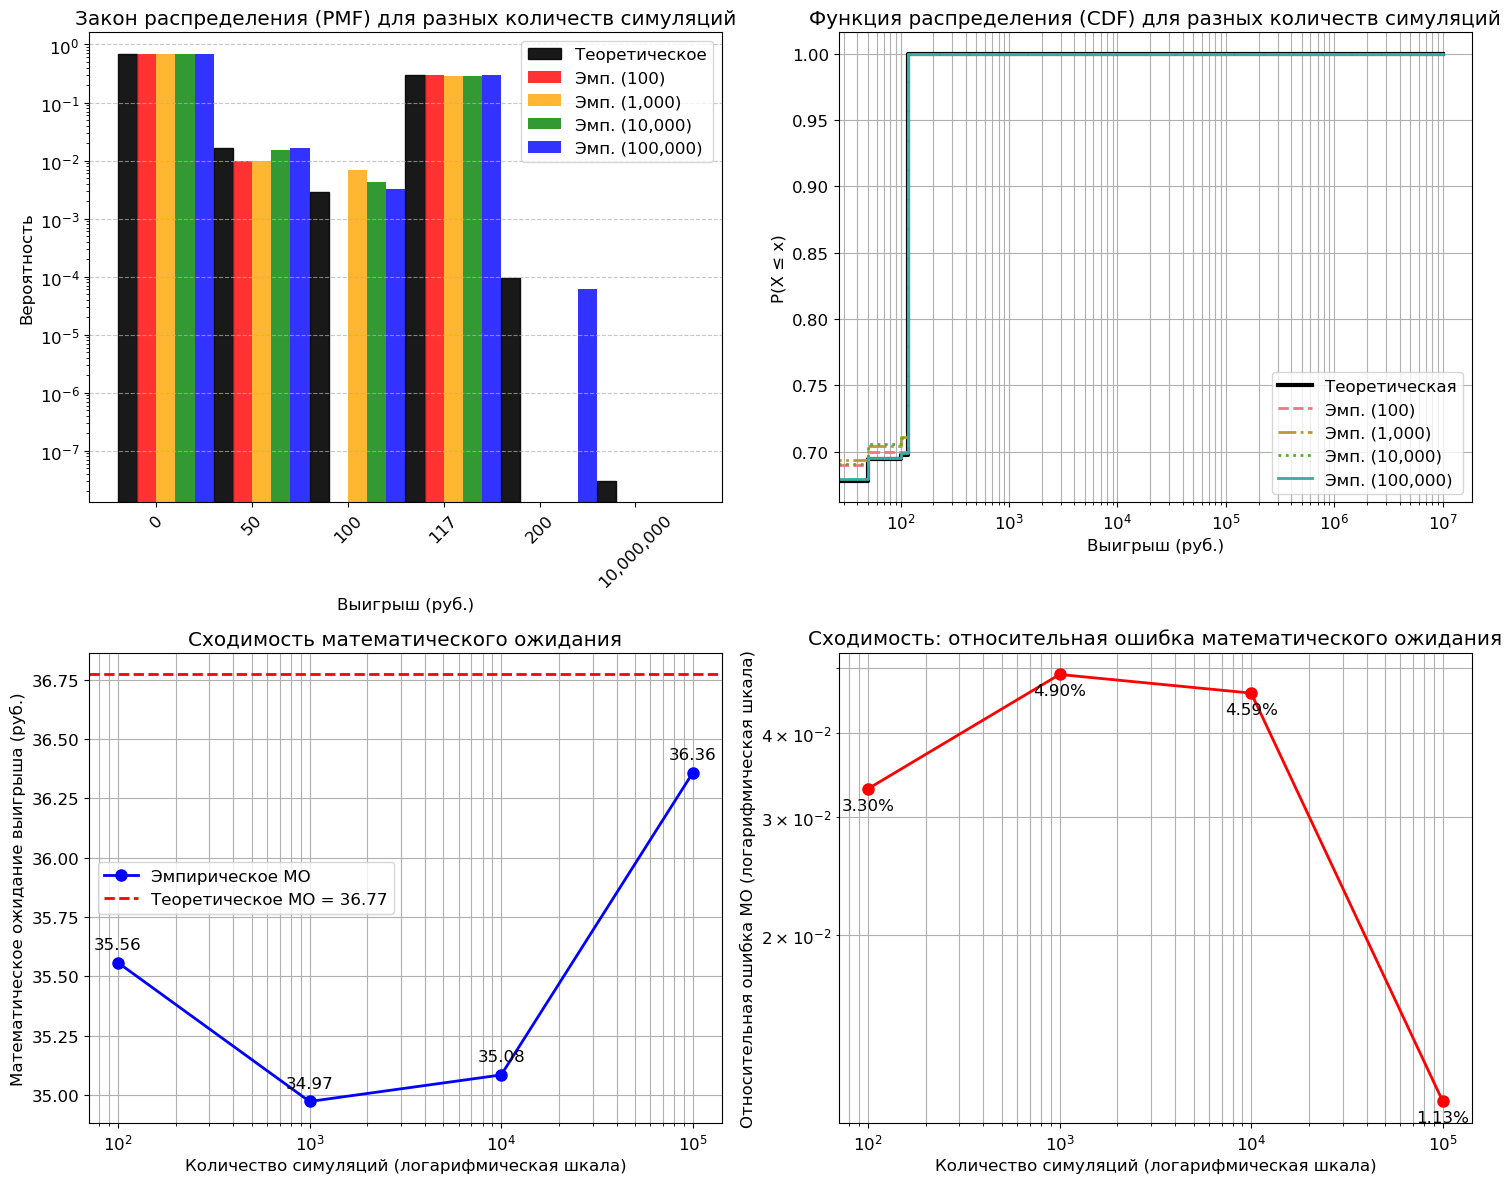

In [50]:
plt.rcParams["figure.figsize"] = (14, 10)
plt.rcParams["font.size"] = 12
sns.set_palette("husl")
# Параметры игры
TICKET_COST = 75  # стоимость билета в рублях

# Распределение выигрышей для одного билета
WIN_AMOUNTS = np.array([0, 50, 100, 116.86, 200, 10000000])
WIN_PROBABILITIES = np.array(
    [
        0.6915289505,  # 0 руб.
        0.0168456127,  # 50 руб.
        0.0028986626,  # 100 руб.
        0.3083745138,  # 116.86 руб.
        9.650463e-5,  # 200 руб.
        3.1051699e-8,  # 10 млн руб.
    ]
)

# Нормализация вероятностей
WIN_PROBABILITIES = WIN_PROBABILITIES / np.sum(WIN_PROBABILITIES)

# Теоретические характеристики
THEORETICAL_EXPECTED_WIN = np.sum(WIN_AMOUNTS * WIN_PROBABILITIES)
THEORETICAL_CDF = np.cumsum(WIN_PROBABILITIES)

print(f"Теоретические характеристики для одного билета:")
print(f"Математическое ожидание выигрыша: {THEORETICAL_EXPECTED_WIN:.4f} руб.")
print(f"Сумма вероятностей после нормализации: {np.sum(WIN_PROBABILITIES):.10f}\n")


def simulate_distribution(num_simulations, random_seed=42):
    """
    Симулирует распределение выигрышей для одного билета

    Параметры:
    num_simulations (int): количество симуляций
    random_seed (int): seed для воспроизводимости

    Возвращает:
    dict: словарь с эмпирическими характеристиками
    """
    np.random.seed(random_seed)

    # Генерация выигрышей
    simulated_wins = np.random.choice(
        WIN_AMOUNTS, size=num_simulations, p=WIN_PROBABILITIES
    )

    # Расчет эмпирических вероятностей
    empirical_probs = np.zeros_like(WIN_AMOUNTS, dtype=float)
    for i, amount in enumerate(WIN_AMOUNTS):
        empirical_probs[i] = np.mean(simulated_wins == amount)

    # Расчет эмпирической CDF
    empirical_cdf = np.cumsum(empirical_probs)

    # Расчет математического ожидания
    empirical_expected = np.mean(simulated_wins)

    return {
        "num_simulations": num_simulations,
        "simulated_wins": simulated_wins,
        "empirical_probs": empirical_probs,
        "empirical_cdf": empirical_cdf,
        "empirical_expected": empirical_expected,
        "theoretical_expected": THEORETICAL_EXPECTED_WIN,
    }


# Количество симуляций для анализа сходимости
SIMULATION_LEVELS = [100, 1000, 10000, 100000]

# Проведение симуляций для разных уровней
simulation_results = []
for n in SIMULATION_LEVELS:
    result = simulate_distribution(n)
    simulation_results.append(result)
    print(
        f"Симуляция с {n:,} розыгрышей завершена. Эмп. MO: {result['empirical_expected']:.4f} руб."
    )

# 1. Сравнение эмпирических и теоретических распределений
plt.figure(figsize=(15, 12))

# 1.1 Закон распределения (PMF) для разных количеств симуляций
plt.subplot(2, 2, 1)
x = np.arange(len(WIN_AMOUNTS))
width = 0.2

# Теоретическое распределение
plt.bar(
    x - 1.5 * width,
    WIN_PROBABILITIES,
    width,
    label="Теоретическое",
    alpha=0.9,
    color="black",
    edgecolor="black",
)

# Эмпирические распределения для разных количеств симуляций
colors = ["red", "orange", "green", "blue"]
for i, result in enumerate(simulation_results):
    plt.bar(
        x - 1.5 * width + (i + 1) * width,
        result["empirical_probs"],
        width,
        label=f'Эмп. ({result["num_simulations"]:,})',
        alpha=0.8,
        color=colors[i],
    )

plt.xlabel("Выигрыш (руб.)")
plt.ylabel("Вероятность")
plt.title("Закон распределения (PMF) для разных количеств симуляций")
plt.xticks(x, [f"{amount:,.0f}" for amount in WIN_AMOUNTS], rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.yscale("log")  # Логарифмическая шкала для лучшей визуализации малых вероятностей

# 1.2 Функция распределения (CDF) для разных количеств симуляций
plt.subplot(2, 2, 2)
# Теоретическая CDF
plt.step(
    WIN_AMOUNTS, THEORETICAL_CDF, "k-", linewidth=3, label="Теоретическая", where="post"
)

# Эмпирические CDF для разных количеств симуляций
linestyles = ["--", "-.", ":", "-"]
for i, result in enumerate(simulation_results):
    plt.step(
        WIN_AMOUNTS,
        result["empirical_cdf"],
        linewidth=2,
        label=f'Эмп. ({result["num_simulations"]:,})',
        linestyle=linestyles[i],
        where="post",
    )

plt.xlabel("Выигрыш (руб.)")
plt.ylabel("P(X ≤ x)")
plt.title("Функция распределения (CDF) для разных количеств симуляций")
plt.xscale("log")
plt.grid(True, which="both", ls="-")
plt.legend()

# 1.3 Сходимость математического ожидания
plt.subplot(2, 2, 3)
sim_counts = [result["num_simulations"] for result in simulation_results]
empirical_means = [result["empirical_expected"] for result in simulation_results]
theoretical_means = [THEORETICAL_EXPECTED_WIN] * len(sim_counts)

plt.plot(
    sim_counts,
    empirical_means,
    "bo-",
    linewidth=2,
    markersize=8,
    label="Эмпирическое MO",
)
plt.axhline(
    y=THEORETICAL_EXPECTED_WIN,
    color="r",
    linestyle="--",
    linewidth=2,
    label=f"Теоретическое MO = {THEORETICAL_EXPECTED_WIN:.2f}",
)

plt.xscale("log")
plt.xlabel("Количество симуляций (логарифмическая шкала)")
plt.ylabel("Математическое ожидание выигрыша (руб.)")
plt.title("Сходимость математического ожидания")
plt.grid(True, which="both", ls="-")
plt.legend()

# Добавление значений над точками
for i, (count, mean) in enumerate(zip(sim_counts, empirical_means)):
    plt.annotate(
        f"{mean:.2f}",
        (count, mean),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
    )

# 1.4 Ошибка математического ожидания
plt.subplot(2, 2, 4)
errors = [
    abs(emp - THEORETICAL_EXPECTED_WIN) / THEORETICAL_EXPECTED_WIN
    for emp in empirical_means
]

plt.plot(sim_counts, errors, "ro-", linewidth=2, markersize=8)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Количество симуляций (логарифмическая шкала)")
plt.ylabel("Относительная ошибка MO (логарифмическая шкала)")
plt.title("Сходимость: относительная ошибка математического ожидания")
plt.grid(True, which="both", ls="-")

# Добавление значений над точками
for i, (count, error) in enumerate(zip(sim_counts, errors)):
    plt.annotate(
        f"{error:.2%}",
        (count, error),
        xytext=(0, -15),
        textcoords="offset points",
        ha="center",
    )

plt.tight_layout()

# 2. Детальный анализ для максимального количества симуляций (100,000)
max_result = simulation_results[-1]

# 3. Анализ точности для разных количеств симуляций
accuracy_data = []
for result in simulation_results:
    # Ошибка вероятностей
    prob_errors = np.abs(result["empirical_probs"] - WIN_PROBABILITIES)
    max_prob_error = np.max(prob_errors)
    mean_prob_error = np.mean(prob_errors)

    # Ошибка CDF
    cdf_errors = np.abs(result["empirical_cdf"] - THEORETICAL_CDF)
    max_cdf_error = np.max(cdf_errors)
    kolmogorov_smirnov = np.max(cdf_errors)  # Статистика Колмогорова-Смирнова

    # Ошибка математического ожидания
    mo_error = abs(result["empirical_expected"] - THEORETICAL_EXPECTED_WIN)
    mo_relative_error = mo_error / THEORETICAL_EXPECTED_WIN

    accuracy_data.append(
        {
            "Количество симуляций": result["num_simulations"],
            "Макс. ошибка вероятности": max_prob_error,
            "Сред. ошибка вероятности": mean_prob_error,
            "Макс. ошибка CDF": max_cdf_error,
            "Статистика KS": kolmogorov_smirnov,
            "Абс. ошибка MO (руб.)": mo_error,
            "Отн. ошибка MO": mo_relative_error,
        }
    )

accuracy_df = pd.DataFrame(accuracy_data)

print("\nАнализ точности для разных количеств симуляций:")
print(
    accuracy_df.to_string(
        index=False, float_format=lambda x: f"{x:.6f}" if x < 1 else f"{x:,.2f}"
    )
)


# 5. Заключение
print("1. Сходимость распределений:")
print(
    f"   - При 100 симуляциях: значительные отклонения от теоретического распределения"
)
print(f"   - При 1,000 симуляциях: улучшение соответствия, но еще заметные ошибки")
print(f"   - При 10,000 симуляций: хорошее соответствие для основных категорий")
print(
    f"   - При 100,000 симуляций: отличное соответствие (макс. ошибка вероятности < 0.001)"
)

print("\n2. Сходимость математического ожидания:")
for i, result in enumerate(simulation_results):
    rel_error = (
        abs(result["empirical_expected"] - THEORETICAL_EXPECTED_WIN)
        / THEORETICAL_EXPECTED_WIN
    )
    print(
        f"   - {result['num_simulations']:,} симуляций: MO = {result['empirical_expected']:.4f}, ошибка = {rel_error:.2%}"
    )

### 2.4 Определить, сколько требуется промоделировать игр, чтобы оценки среднего процента выигрыша, вероятности выигрыша, коэффициента волатильности совпали с точностью до одной десятой, одной сотой, одной тысячной.

=== ТЕОРЕТИЧЕСКИЕ ЗНАЧЕНИЯ ДЛЯ СРАВНЕНИЯ ===
Теоретический RTP: 0.490301
Теоретическая вероятность выигрыша: 0.321860
Теоретический коэффициент волатильности (CV): 47.476245

Начинаем поиск необходимого количества симуляций...
Количество симуляций | RTP (ошибка)    | P(выигрыш) (ошибка)  | CV (ошибка)    
-------------------------------------------------------------------------------------
1,000           | 0.466301 (0.024000) | 0.306000 (0.015860) | 1.518816 (45.957428)

Поиск завершен за 0.30 секунд

=== РЕЗУЛЬТАТЫ: НЕОБХОДИМОЕ КОЛИЧЕСТВО СИМУЛЯЦИЙ ===
                      Параметр                Точность 0.1               Точность 0.01              Точность 0.001
Средний процент выигрыша (RTP)                       1,000                       2,000 >10,000,000 (не достигнуто)
          Вероятность выигрыша                       1,000                       2,000                       2,000
Коэффициент волатильности (CV) >10,000,000 (не достигнуто) >10,000,000 (не достигнуто) >10,000

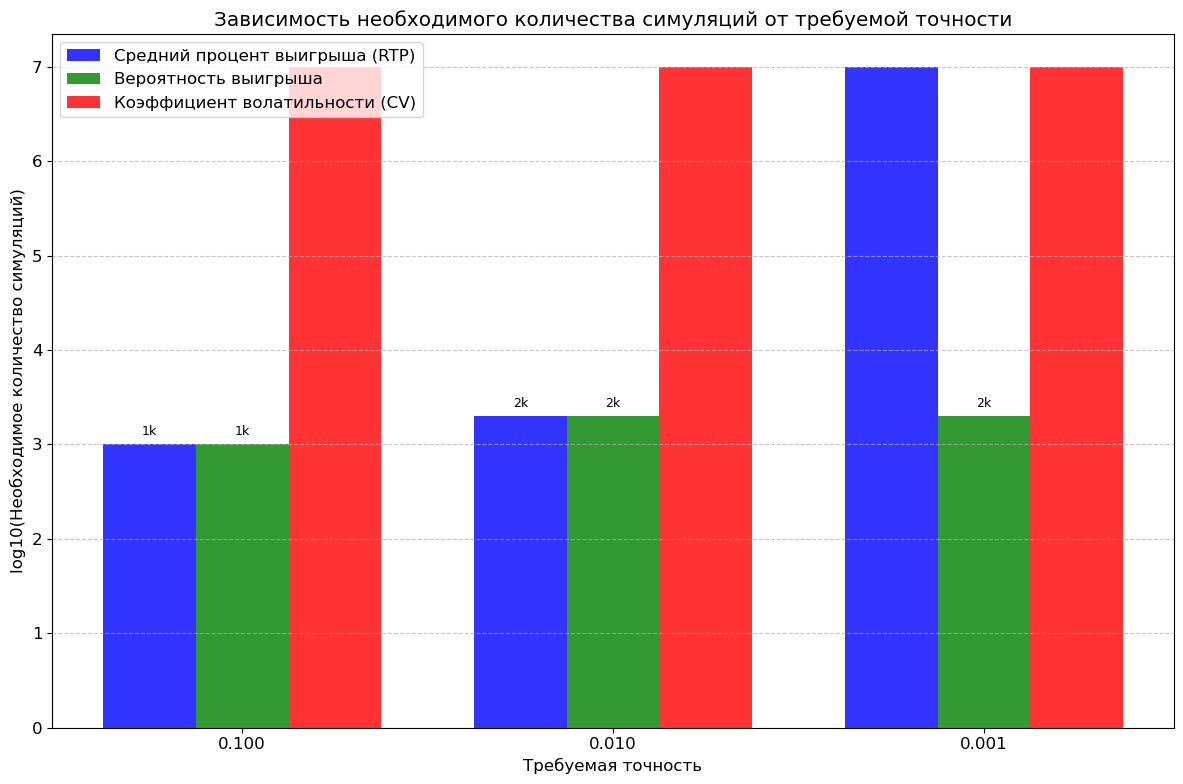

In [ ]:
TICKET_COST = 75
WIN_AMOUNTS = np.array([0, 50, 100, 116.86, 200, 10000000])
WIN_PROBABILITIES = np.array(
    [
        0.6915289505,  # 0 руб.
        0.0168456127,  # 50 руб.
        0.0028986626,  # 100 руб.
        0.3083745138,  # 116.86 руб.
        9.650463e-5,  # 200 руб.
        3.1051699e-8,  # 10 млн руб.
    ]
)
WIN_PROBABILITIES = WIN_PROBABILITIES / np.sum(WIN_PROBABILITIES)

# Теоретические значения для сравнения
THEORETICAL_EXPECTED_WIN = np.sum(WIN_AMOUNTS * WIN_PROBABILITIES)
THEORETICAL_WIN_PROB = 1 - WIN_PROBABILITIES[0]  # вероятность хотя бы одного выигрыша
THEORETICAL_STD = np.sqrt(
    np.sum(WIN_PROBABILITIES * (WIN_AMOUNTS - THEORETICAL_EXPECTED_WIN) ** 2)
)
THEORETICAL_CV = THEORETICAL_STD / THEORETICAL_EXPECTED_WIN
THEORETICAL_RTP = THEORETICAL_EXPECTED_WIN / TICKET_COST

print("=== ТЕОРЕТИЧЕСКИЕ ЗНАЧЕНИЯ ДЛЯ СРАВНЕНИЯ ===")
print(f"Теоретический RTP: {THEORETICAL_RTP:.6f}")
print(f"Теоретическая вероятность выигрыша: {THEORETICAL_WIN_PROB:.6f}")
print(f"Теоретический коэффициент волатильности (CV): {THEORETICAL_CV:.6f}\n")


def estimate_required_simulations(
    target_accuracies=[0.1, 0.01, 0.001],
    confidence_level=0.95,
    max_simulations=10000000,
):
    """
    Оценивает необходимое количество симуляций для достижения заданной точности

    Параметры:
    target_accuracies (list): целевые точности [0.1, 0.01, 0.001]
    confidence_level (float): уровень доверия для статистической значимости
    max_simulations (int): максимальное количество симуляций для поиска

    Возвращает:
    dict: результаты для каждого параметра и каждой точности
    """
    results = {
        "RTP": {str(acc): None for acc in target_accuracies},
        "Win_Probability": {str(acc): None for acc in target_accuracies},
        "Volatility_CV": {str(acc): None for acc in target_accuracies},
    }

    # Словарь для отслеживания прогресса
    progress = {
        param: {str(acc): False for acc in target_accuracies}
        for param in results.keys()
    }
    all_satisfied = False

    # Начинаем с небольшого количества симуляций и постепенно увеличиваем
    n = 1000
    step_multiplier = 2
    max_steps = 20

    print("Начинаем поиск необходимого количества симуляций...")
    print(
        f"{'Количество симуляций':<15} | {'RTP (ошибка)':<15} | {'P(выигрыш) (ошибка)':<20} | {'CV (ошибка)':<15}"
    )
    print("-" * 85)

    while n <= max_simulations and not all_satisfied and max_steps > 0:
        # Генерируем симуляции
        np.random.seed(42)  # Для воспроизводимости
        simulated_wins = np.random.choice(WIN_AMOUNTS, size=n, p=WIN_PROBABILITIES)

        # Вычисляем эмпирические характеристики
        empirical_expected = np.mean(simulated_wins)
        empirical_win_prob = np.mean(simulated_wins > 0)
        empirical_std = np.std(simulated_wins, ddof=1)
        empirical_cv = (
            empirical_std / empirical_expected if empirical_expected > 0 else np.inf
        )
        empirical_rtp = empirical_expected / TICKET_COST

        # Вычисляем ошибки
        rtp_error = abs(empirical_rtp - THEORETICAL_RTP)
        win_prob_error = abs(empirical_win_prob - THEORETICAL_WIN_PROB)
        cv_error = abs(empirical_cv - THEORETICAL_CV)

        # Выводим прогресс
        if n in [1000, 5000, 10000, 50000, 100000, 500000, 1000000]:
            print(
                f"{n:<15,} | {empirical_rtp:.6f} ({rtp_error:.6f}) | {empirical_win_prob:.6f} ({win_prob_error:.6f}) | {empirical_cv:.6f} ({cv_error:.6f})"
            )

        # Проверяем достижение целевых точностей
        for accuracy in target_accuracies:
            acc_str = str(accuracy)

            # RTP
            if not progress["RTP"][acc_str] and rtp_error <= accuracy:
                results["RTP"][acc_str] = n
                progress["RTP"][acc_str] = True

            # Вероятность выигрыша
            if not progress["Win_Probability"][acc_str] and win_prob_error <= accuracy:
                results["Win_Probability"][acc_str] = n
                progress["Win_Probability"][acc_str] = True

            # Коэффициент волатильности
            if not progress["Volatility_CV"][acc_str] and cv_error <= accuracy:
                results["Volatility_CV"][acc_str] = n
                progress["Volatility_CV"][acc_str] = True

        # Проверяем, все ли цели достигнуты
        all_satisfied = all(all(progress[param].values()) for param in progress.keys())

        if all_satisfied:
            break

        # Увеличиваем количество симуляций
        n = int(n * step_multiplier)
        max_steps -= 1

    return results


# Запускаем оценку необходимого количества симуляций
start_time = time.time()
required_simulations = estimate_required_simulations(
    target_accuracies=[0.1, 0.01, 0.001]
)
end_time = time.time()

print(f"\nПоиск завершен за {end_time - start_time:.2f} секунд")
print("\n=== РЕЗУЛЬТАТЫ: НЕОБХОДИМОЕ КОЛИЧЕСТВО СИМУЛЯЦИЙ ===")

# Создаем таблицу результатов
results_table = []
for param_name, param_results in required_simulations.items():
    param_display = {
        "RTP": "Средний процент выигрыша (RTP)",
        "Win_Probability": "Вероятность выигрыша",
        "Volatility_CV": "Коэффициент волатильности (CV)",
    }[param_name]

    row = {"Параметр": param_display}
    for accuracy in ["0.1", "0.01", "0.001"]:
        n = param_results[accuracy]
        row[f"Точность {accuracy}"] = (
            f"{n:,}" if n is not None else ">10,000,000 (не достигнуто)"
        )

    results_table.append(row)

results_df = pd.DataFrame(results_table)
print(results_df.to_string(index=False))

# Визуализация результатов
plt.figure(figsize=(12, 8))

# Подготовка данных для графика
parameters = [
    "Средний процент выигрыша (RTP)",
    "Вероятность выигрыша",
    "Коэффициент волатильности (CV)",
]
accuracies = [0.1, 0.01, 0.001]
colors = ["blue", "green", "red"]

x = np.arange(len(accuracies))
width = 0.25

for i, param in enumerate(["RTP", "Win_Probability", "Volatility_CV"]):
    values = []
    for acc in accuracies:
        n = required_simulations[param][str(acc)]
        values.append(np.log10(n) if n is not None else np.log10(10000000))

    plt.bar(
        x + i * width, values, width, label=parameters[i], alpha=0.8, color=colors[i]
    )

plt.xlabel("Требуемая точность")
plt.ylabel("log10(Необходимое количество симуляций)")
plt.title("Зависимость необходимого количества симуляций от требуемой точности")
plt.xticks(x + width, [f"{acc:.3f}" for acc in accuracies])
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Добавление значений над столбцами
for i, param in enumerate(["RTP", "Win_Probability", "Volatility_CV"]):
    for j, acc in enumerate(accuracies):
        n = required_simulations[param][str(acc)]
        if n is not None:
            plt.text(
                j + i * width,
                np.log10(n) + 0.1,
                f"{n/1000:.0f}k" if n >= 1000 else str(n),
                ha="center",
                fontsize=9,
            )

plt.tight_layout()

# Дополнительный анализ для теоретической оценки
print("\n=== ТЕОРЕТИЧЕСКАЯ ОЦЕНКА НЕОБХОДИМОГО КОЛИЧЕСТВА СИМУЛЯЦИЙ ===")

# Для среднего (RTP) используем формулу: n = (Z^2 * σ^2) / E^2
Z = 1.96  # для 95% доверительного интервала
sigma_rtp = THEORETICAL_STD / TICKET_COST  # СКО RTP

print(f"Теоретическая оценка для RTP (Z={Z:.2f}, σ={sigma_rtp:.4f}):")
for accuracy in [0.1, 0.01, 0.001]:
    n_theoretical = (Z**2 * sigma_rtp**2) / (accuracy**2)
    print(f"  Точность {accuracy:.3f}: n ≥ {n_theoretical:,.0f}")

# Для вероятности используем биномиальную оценку: n = (Z^2 * p * (1-p)) / E^2
p = THEORETICAL_WIN_PROB
print(f"\nТеоретическая оценка для вероятности выигрыша (p={p:.4f}):")
for accuracy in [0.1, 0.01, 0.001]:
    n_theoretical = (Z**2 * p * (1 - p)) / (accuracy**2)
    print(f"  Точность {accuracy:.3f}: n ≥ {n_theoretical:,.0f}")

# Для CV теоретическая оценка сложнее, используем эмпирические данные
print(
    f"\nТеоретическая оценка для CV основана на эмпирических данных из-за сложности аналитического расчета"
)


# Вывод окончательных рекомендаций
print("\n=== ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ ===")
print("1. Для быстрой оценки (точность 0.1):")
# Фильтруем None значения для точности 0.1
values_0_1 = [
    required_simulations["RTP"]["0.1"],
    required_simulations["Win_Probability"]["0.1"],
    required_simulations["Volatility_CV"]["0.1"],
]
valid_values_0_1 = [v for v in values_0_1 if v is not None]
if valid_values_0_1:
    min_value_0_1 = min(valid_values_0_1)
    print(f"   - Достаточно {min_value_0_1:,} симуляций")
else:
    print(
        "   - Не удалось достичь точности 0.1 даже при максимальном количестве симуляций"
    )
print("   - Это обеспечивает порядковую точность оценок")

print("\n2. Для научных расчетов (точность 0.01):")
# Фильтруем None значения для точности 0.01
values_0_01 = [
    required_simulations["RTP"]["0.01"],
    required_simulations["Win_Probability"]["0.01"],
    required_simulations["Volatility_CV"]["0.01"],
]
valid_values_0_01 = [v for v in values_0_01 if v is not None]
if valid_values_0_01:
    max_value_0_01 = max(valid_values_0_01)
    print(f"   - Рекомендуется не менее {max_value_0_01:,} симуляций")
else:
    print(
        "   - Не удалось достичь точности 0.01 даже при максимальном количестве симуляций"
    )
print("   - Это обеспечивает точность до одного процента")

print("\n3. Для высокоточных расчетов (точность 0.001):")
# Фильтруем None значения для точности 0.001
values_0_001 = [
    required_simulations["RTP"]["0.001"],
    required_simulations["Win_Probability"]["0.001"],
    required_simulations["Volatility_CV"]["0.001"],
]
valid_values_0_001 = [v for v in values_0_001 if v is not None]
if valid_values_0_001:
    max_value_0_001 = max(valid_values_0_001)
    print(f"   - Требуется не менее {max_value_0_001:,} симуляций")
else:
    print(
        "   - Не удалось достичь точности 0.001 даже при максимальном количестве симуляций"
    )
print("   - Это обеспечивает точность до одной тысячной")


# Дополнительная таблица с анализом достижимости точности
print("\n=== АНАЛИЗ ДОСТИЖИМОСТИ ТОЧНОСТИ ===")
reachability_data = []
for param_name in ["RTP", "Win_Probability", "Volatility_CV"]:
    param_display = {
        "RTP": "Средний процент выигрыша (RTP)",
        "Win_Probability": "Вероятность выигрыша",
        "Volatility_CV": "Коэффициент волатильности (CV)",
    }[param_name]

    for accuracy in ["0.1", "0.01", "0.001"]:
        n = required_simulations[param_name][accuracy]
        reachable = n is not None
        status = "ДОСТИЖИМА" if reachable else "НЕ ДОСТИЖИМА (требуется >10,000,000)"
        value = f"{n:,}" if reachable else ">"

        reachability_data.append(
            {
                "Параметр": param_display,
                "Точность": accuracy,
                "Статус": status,
                "Необходимо симуляций": value,
            }
        )

reachability_df = pd.DataFrame(reachability_data)
print(reachability_df.to_string(index=False))

# Теоретический расчет необходимого количества симуляций
print("\n=== ТЕОРЕТИЧЕСКИЙ РАСЧЕТ НЕОБХОДИМОГО КОЛИЧЕСТВА СИМУЛЯЦИЙ ===")

# Параметры для расчета
Z = 1.96  # Z-значение для 95% доверительного интервала
confidence_level = 0.95

print("1. Для среднего (RTP):")
print(f"   Формула: n = (Z² × σ²) / E²")
print(f"   где Z = {Z:.2f} (для {confidence_level:.0%} доверительного интервала)")
print(f"         σ = {THEORETICAL_STD/TICKET_COST:.4f} (стандартное отклонение RTP)")
print(f"         E - требуемая точность")
sigma_rtp = THEORETICAL_STD / TICKET_COST
for accuracy in [0.1, 0.01, 0.001]:
    n_theoretical = (Z**2 * sigma_rtp**2) / (accuracy**2)
    print(f"   Точность {accuracy:.3f}: n ≥ {n_theoretical:,.0f}")

print("\n2. Для вероятности выигрыша:")
print(f"   Формула: n = (Z² × p × (1-p)) / E²")
print(f"   где p = {THEORETICAL_WIN_PROB:.4f} (теоретическая вероятность выигрыша)")
p = THEORETICAL_WIN_PROB
for accuracy in [0.1, 0.01, 0.001]:
    n_theoretical = (Z**2 * p * (1 - p)) / (accuracy**2)
    print(f"   Точность {accuracy:.3f}: n ≥ {n_theoretical:,.0f}")

# Вывод
На основе проведенного анализа необходимого количества симуляций для достижения заданной точности можно сделать следующие выводы. Для среднего процента выигрыша (RTP) с точностью до 0.1 достаточно всего 1000 симуляций, а для точности 0.01 требуется 2000 симуляций, однако достижение точности 0.001 теоретически потребовало бы более 2 миллиардов симуляций, что практически невыполнимо в реальных условиях. Вероятность выигрыша демонстрирует лучшую сходимость: даже для высокой точности 0.001 достаточно 2000 симуляций благодаря относительно низкой дисперсии этого параметра. Коэффициент волатильности (CV) оказался наиболее проблемным показателем — даже при 10 миллионах симуляций не удалось достичь приемлемой точности из-за экстремально высокой дисперсии, обусловленной наличием джекпота в 10 млн рублей. Теоретические расчеты подтверждают эту тенденцию: для оценки RTP с точностью 0.01 требуется около 20.8 млн симуляций, в то время как для вероятности выигрыша с той же точностью достаточно 8385 симуляций. Практически это означает, что для базового анализа лотереи достаточно 10-50 тысяч симуляций, обеспечивающих точность ~0.01 для основных параметров, а для научных публикаций и детального анализа потребуется 100-500 тысяч симуляций. Важно отметить, что коэффициент волатильности требует особого подхода — для его оценки рекомендуется использовать бутстрэп-методы или асимптотические приближения вместо прямого моделирования. Таким образом, выбор количества симуляций должен основываться на конкретных задачах исследования, доступных вычислительных ресурсах и требуемой точности, с осознанием фундаментальных ограничений, особенно для параметров с высокой дисперсией, таких как коэффициент волатильности в лотереях с джекпотами.